In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# Introduction to Digital Signal Processing

For the purpose of my notebook as an introduction to DSP, I will be examining sound signals.

## Systems and Signals

Excitations are input signals and responses are output signals.
Some examples of signal forms include continuous, discrete, analog, digital, periodic, non-periodic, even symmetry, odd symmetry, and no symmetry forms.
Signals with special waveforms include ramps, exponentials, and impulses.

Signals and systems are either continuous or discrete.

Practical applications of systems include imagers, signal denoising, image deblurring, heart monitoring, music transcribing, and temperature control.


## CONTINUOUS VS. DISCRETE SIGNALS

Mathematically, a signal is any variation of quantity as a function of an independent variable.

Continuous means it is a function which varies with spatial location and time.
Discrete means you are sampling/indexing data from the function at a certain time.

Sampling Theory: There are a minimum number of points to sample a curve, known as 2 * Nyquist frequency.


## CAUSAL VS. NONCAUSAL

Physically realizable systems are real systems (as opposed to purely conceptual or mathematical constructs).

If x(t) == 0 for t < 0, then x(t) is causal.
If x(t) != 0 for t < 0, then x(t) is noncausal.
If x(t) == 0 for t > 0, then x(t) is anticausal.

In practice, we want to evaluate the interaction of causal signals with real systems.


## UNDAMPED VS DAMPED SYSTEMS

Undamped systems have no opposing force to slow down the motion.
Damped systems fade with time (negative e)

The Mass Spring Problem (Simple Harmonic Motion) includes parameters of mass, the spring (which ahs a constant k relating to the material properties of the spring), and force (kx(t) in terms of the spring's properties).


## FAST FOURIER TRANSFORM

Fourier Transform: a mathematical loop to transfer data from the time (spatial, amplitude vs time) to frequency (wave, amplitude vs frequency) domain.

Essentially, we are unmixing the overall signal into its separate signals, and usually we will find a number of higher-amplitude signals that can represent the overall signal and ignore the smaller-amplitude ones as just noise. 
Then, we run the FFT to convert the signals to the frequency domain.

The Phasor diagram is just a nice way to look at our signal mathematically, however we should not rely on it.

# Here, we see visualizations of sound waves for a whistle, pulse, and dial ring.

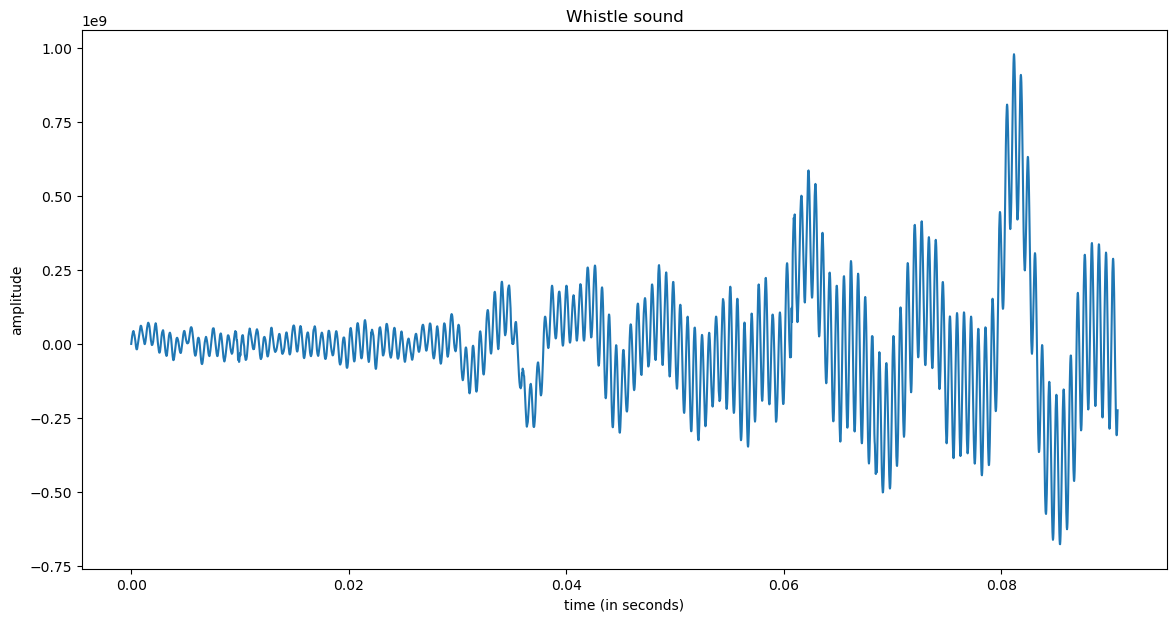

In [66]:
import scipy.io.wavfile

(sample_rate, input_signal) = scipy.io.wavfile.read("audio_files/DSP - Whistle.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)
setup_graph(title='Whistle sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

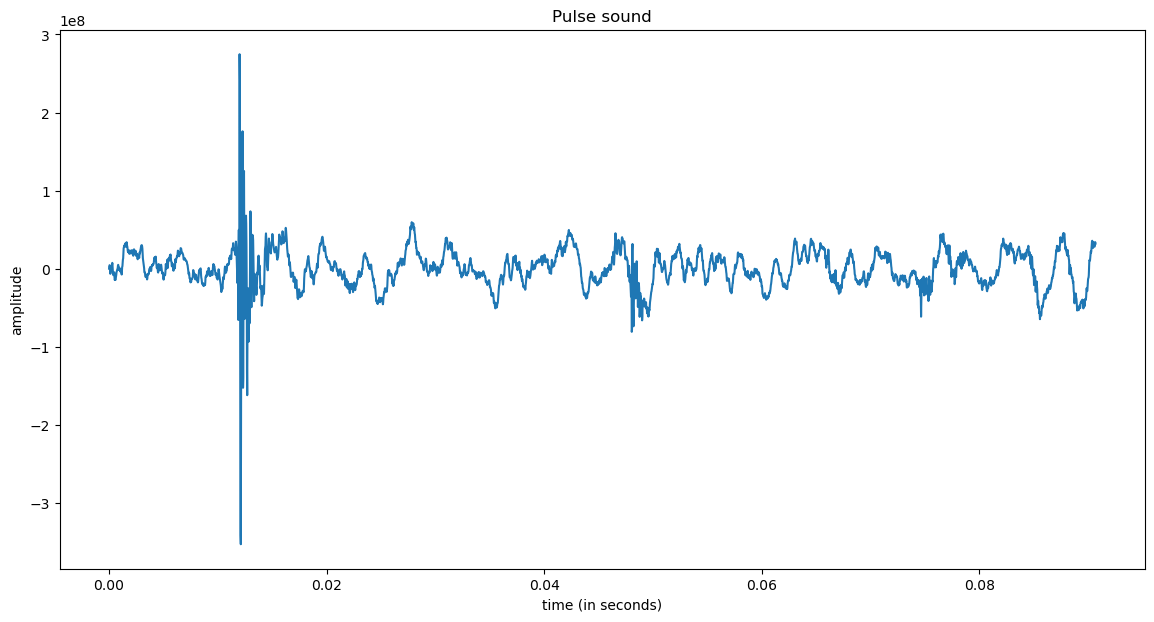

In [65]:
(sample_rate, input_signal) = scipy.io.wavfile.read("audio_files/DSP - Pulse.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)
setup_graph(title='Pulse sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

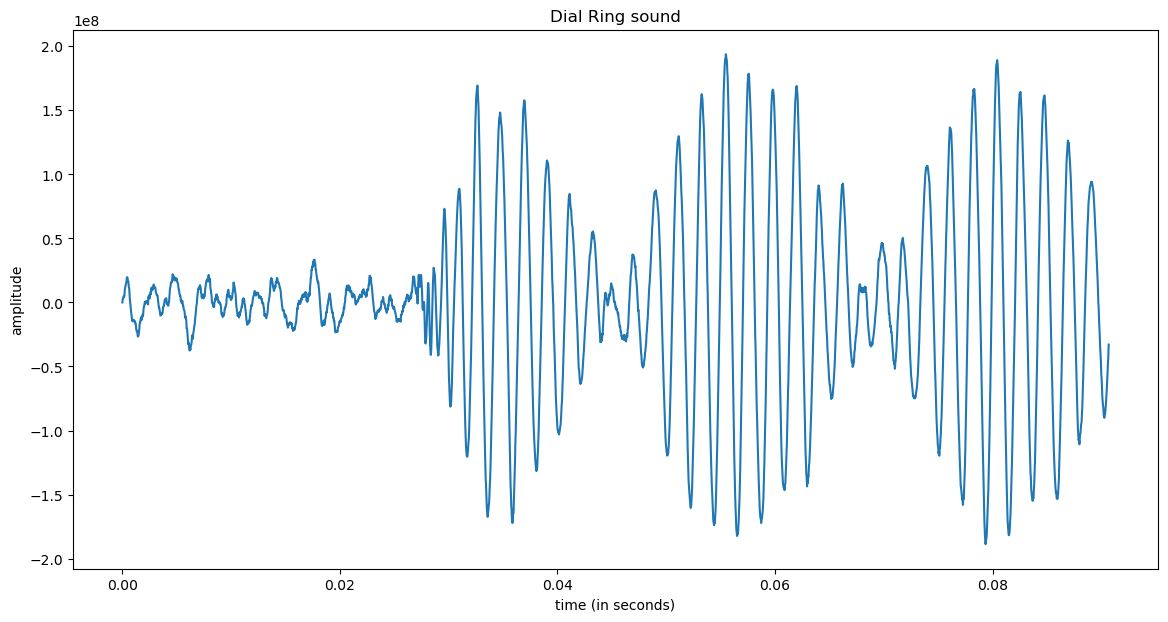

In [67]:
(sample_rate, input_signal) = scipy.io.wavfile.read("audio_files/DSP - Dial Ring.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)
setup_graph(title='Dial Ring sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

# The Superposition Principle

* We find that any signal is the result from summing other individual signals.

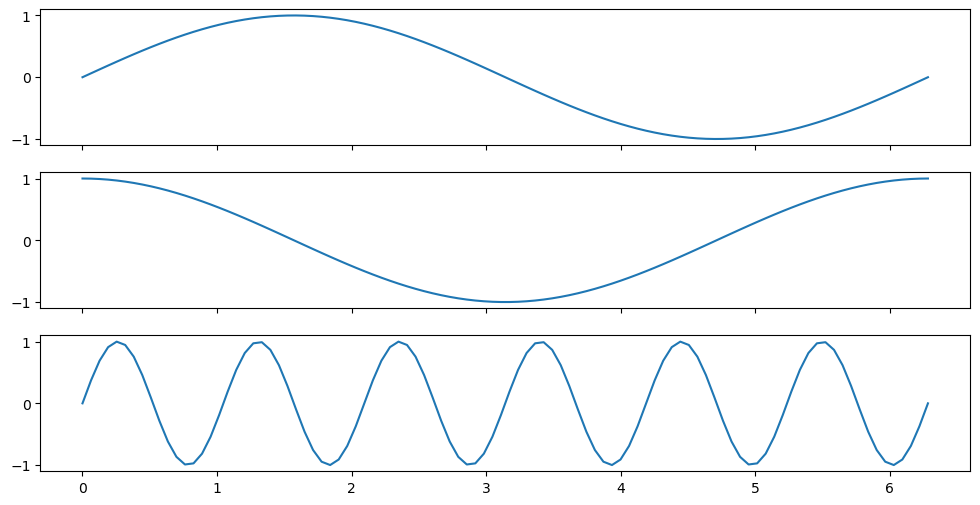

In [18]:
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(6*x)

f, axarr = plt.subplots(3, sharex=True, sharey=True)
f.set_size_inches(12,6)
axarr[0].plot(x, y1)
axarr[1].plot(x, y2)
axarr[2].plot(x, y3)
_ = plt.show()

## We sum these 3 signals into one signal as shown below.

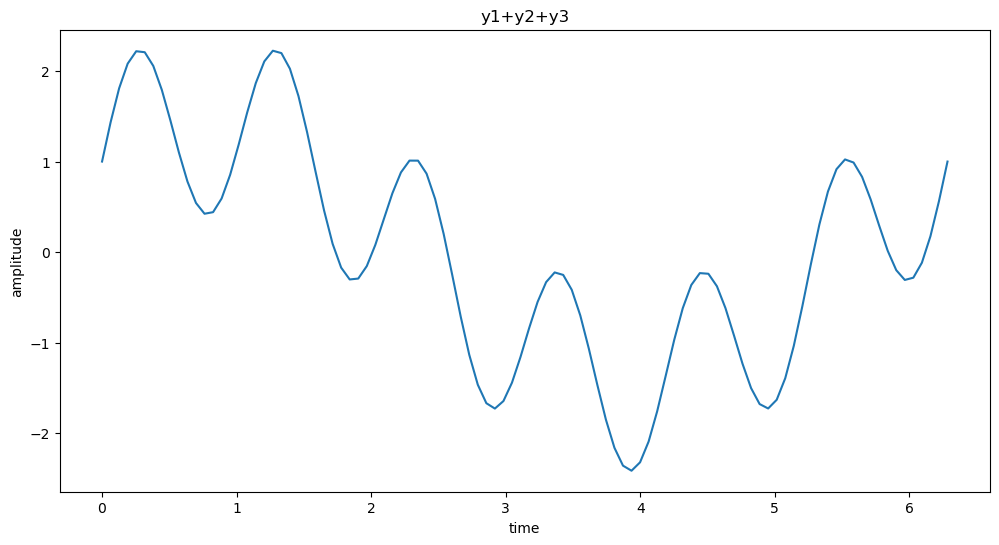

In [21]:
setup_graph(x_label='time', y_label='amplitude', title='y1+y2+y3', fig_size=(12,6))
convoluted_wave = y1 + y2 + y3
_ = plt.plot(x, convoluted_wave)

# Fast Fourier Transform
## Let's look at the sum of another 3 signals:

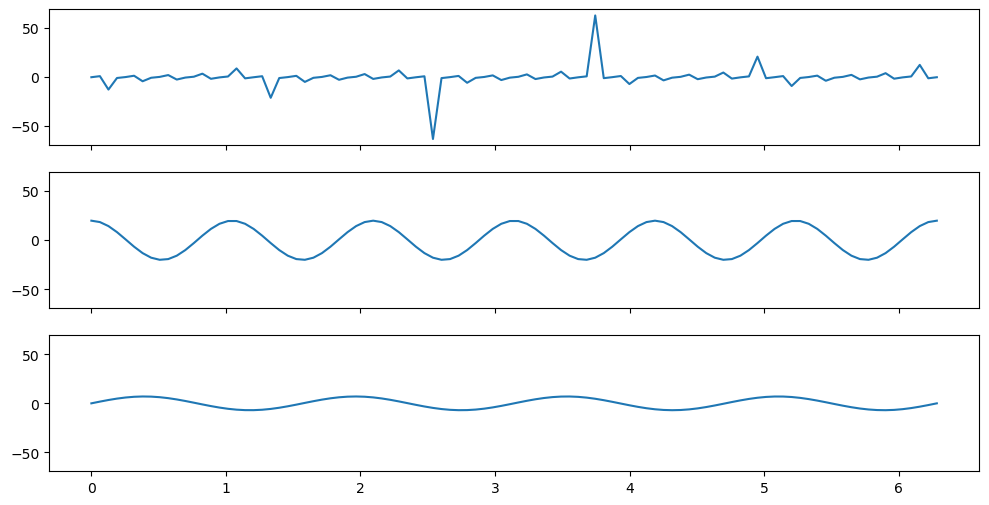

In [64]:
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.tan(13*x)
y2 = 20 * np.cos(6*x)
y3 = 7 * np.sin(4*x)

f, axarr = plt.subplots(3, sharex=True, sharey=True)
f.set_size_inches(12,6)
axarr[0].plot(x, y1)
axarr[1].plot(x, y2)
axarr[2].plot(x, y3)
_ = plt.show()

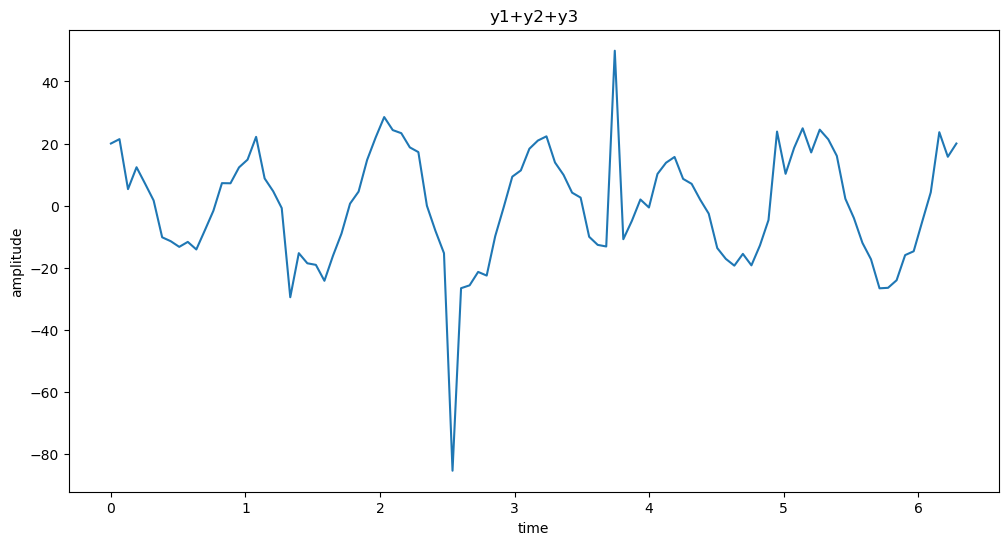

In [65]:
setup_graph(x_label='time', y_label='amplitude', title='y1+y2+y3', fig_size=(12,6))
convoluted_wave = y1 + y2 + y3
_ = plt.plot(x, convoluted_wave)

## We use FFT on this signal to convert it from the time domain to frequency domain.

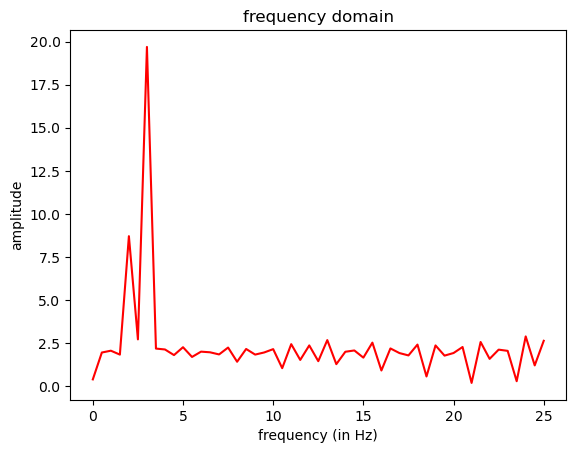

In [71]:
fft_output = np.fft.rfft(convoluted_wave)
num_samples = sample_rate * time_to_plot
magnitude_only = [np.sqrt(i.real**2 + i.imag**2)/len(fft_output) for i in fft_output]
frequencies = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]
setup_graph(x_label='frequency (in Hz)', y_label='amplitude', title='frequency domain')
plt.plot(frequencies, magnitude_only, 'r')

### 

## Now let's apply FFT to our audio signals from earlier. (44100 kHz)

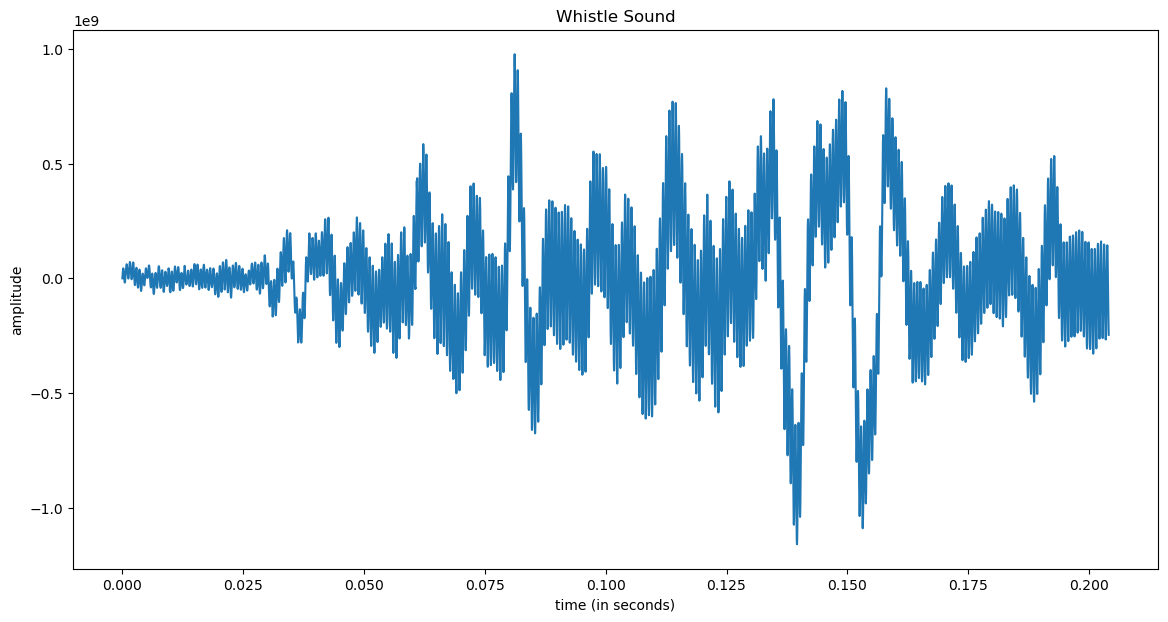

In [141]:
(sample_rate, input_signal) = scipy.io.wavfile.read("audio_files/DSP - Whistle.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)
setup_graph(title='Whistle Sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:9000], input_signal[0:9000])

(0.0, 300.0)

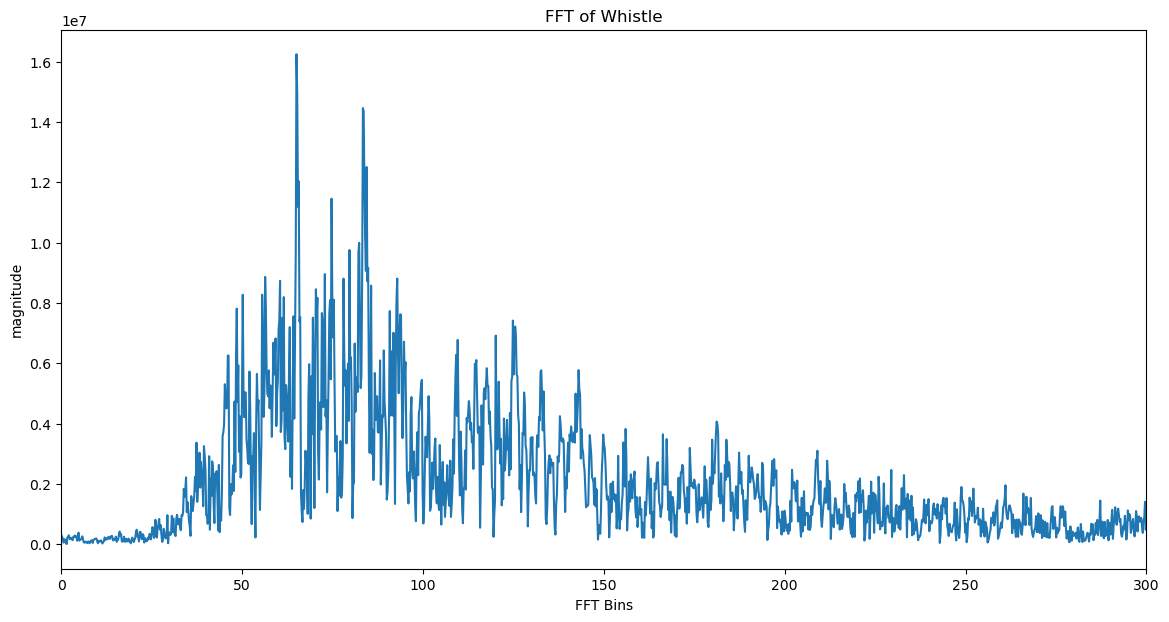

In [143]:
fft_out = np.fft.rfft(input_signal)
fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
num_samples = len(input_signal)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

setup_graph(title='FFT of Whistle', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:3000], fft_mag[0:3000])
plt.xlim(0, 300)

44100


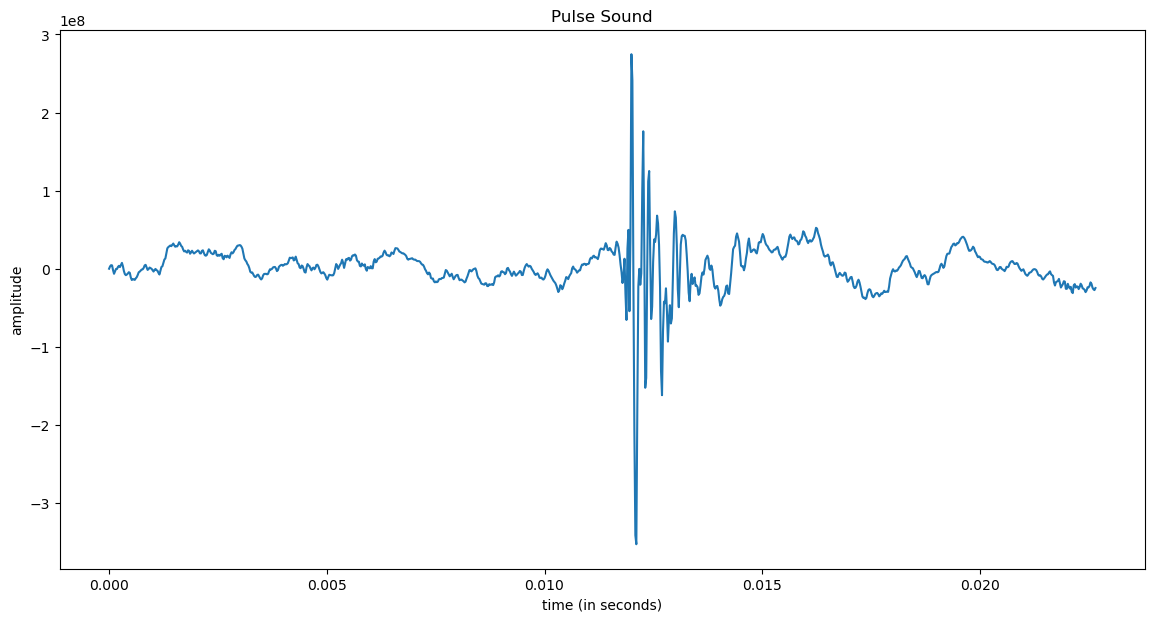

In [116]:
(sample_rate, input_signal) = scipy.io.wavfile.read("audio_files/DSP - Pulse.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)
setup_graph(title='Pulse Sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:1000], input_signal[0:1000])
print(sample_rate)

(0.0, 500.0)

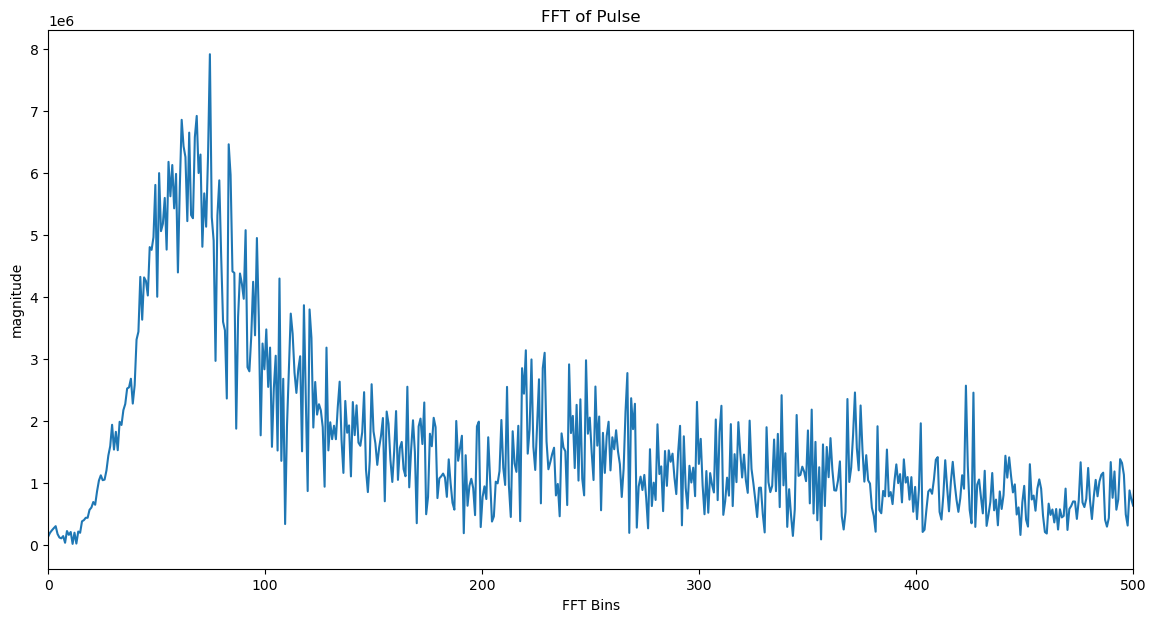

In [114]:
fft_out = np.fft.rfft(input_signal)
fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
num_samples = len(input_signal)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

setup_graph(title='FFT of Pulse', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:1000], fft_mag[0:1000])
np.max(rfreqs)
len(rfreqs)
plt.xlim(0,500)

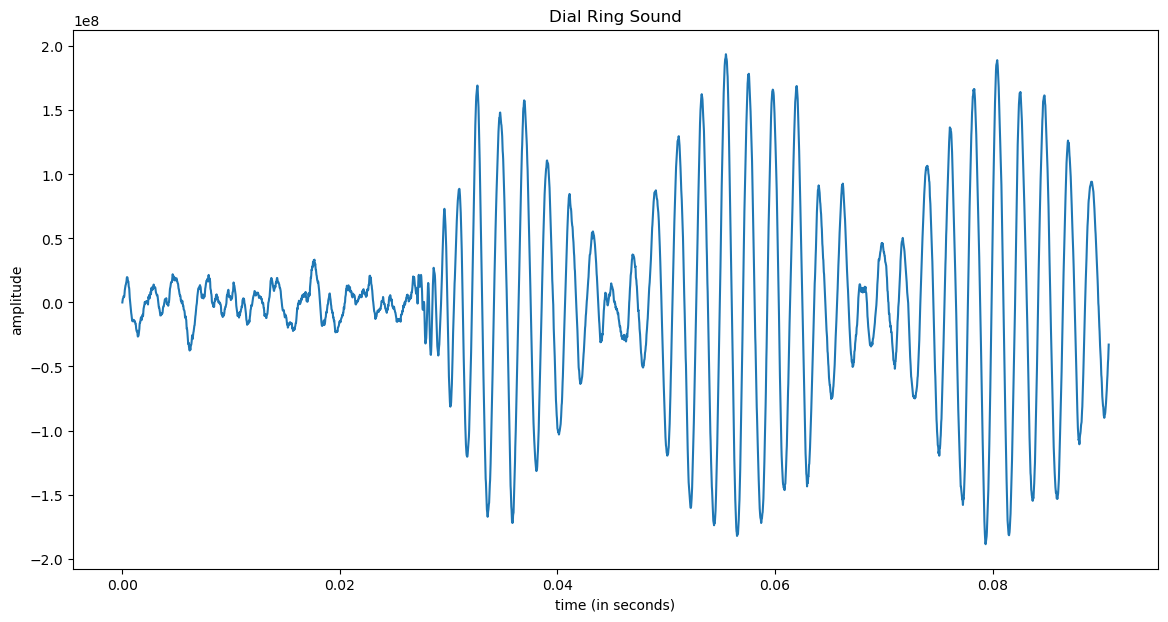

In [163]:
(sample_rate, input_signal) = scipy.io.wavfile.read("audio_files/DSP - Dial Ring.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)
setup_graph(title='Dial Ring Sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

(400.0, 500.0)

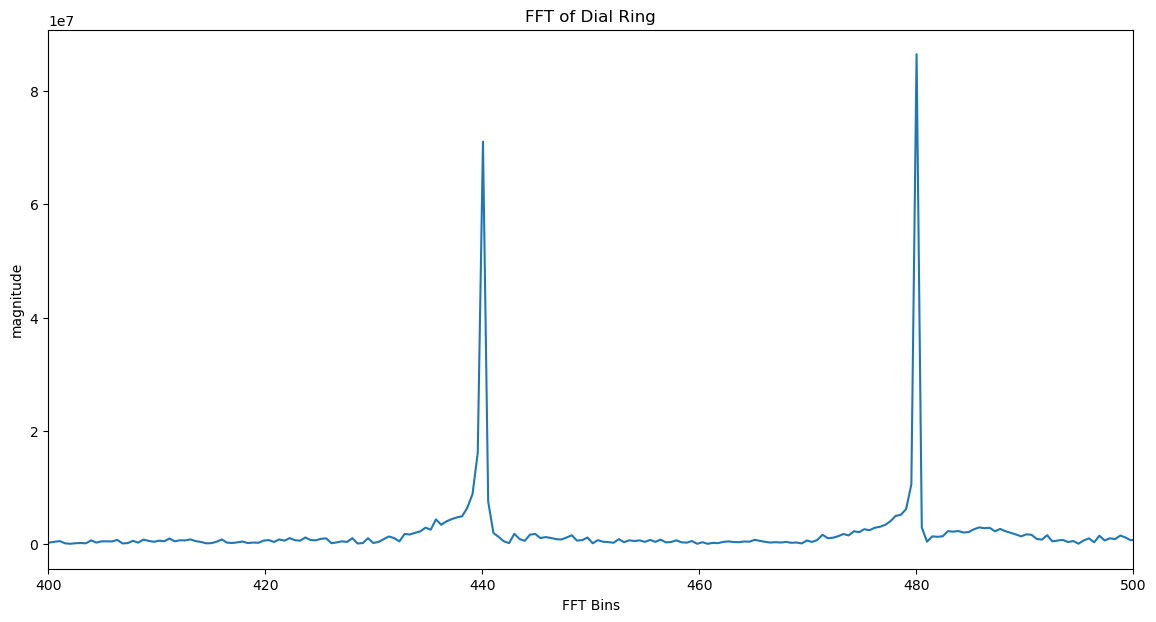

In [169]:
fft_out = np.fft.rfft(input_signal)
fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
num_samples = len(input_signal)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

setup_graph(title='FFT of Dial Ring', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:3000], fft_mag[0:3000])
plt.xlim(400, 500)

# Spectrograms - FFT over Time (3-D)
### x-axis represents time | y-axis represents frequency | colors represent amplitude

In [57]:
(whistle_sample_rate, whistle) = scipy.io.wavfile.read("audio_files/DSP - Whistle.wav")

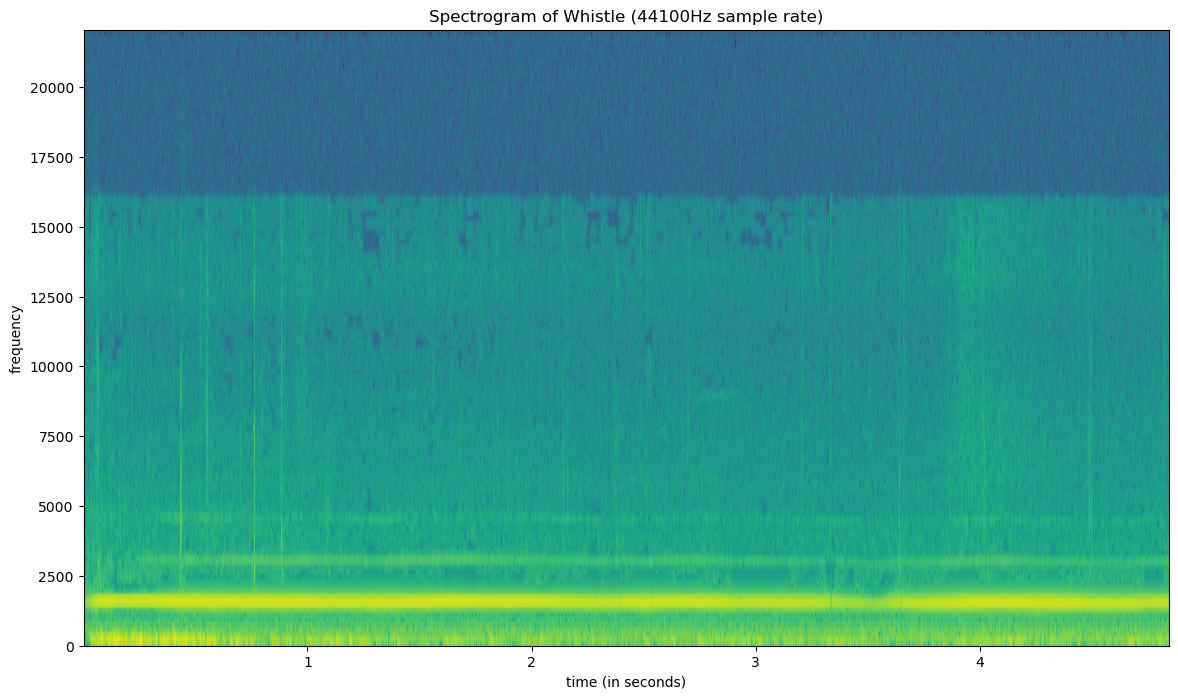

In [46]:
setup_graph(title='Spectrogram of Whistle (44100Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,8))
_ = plt.specgram(whistle, Fs=whistle_sample_rate)

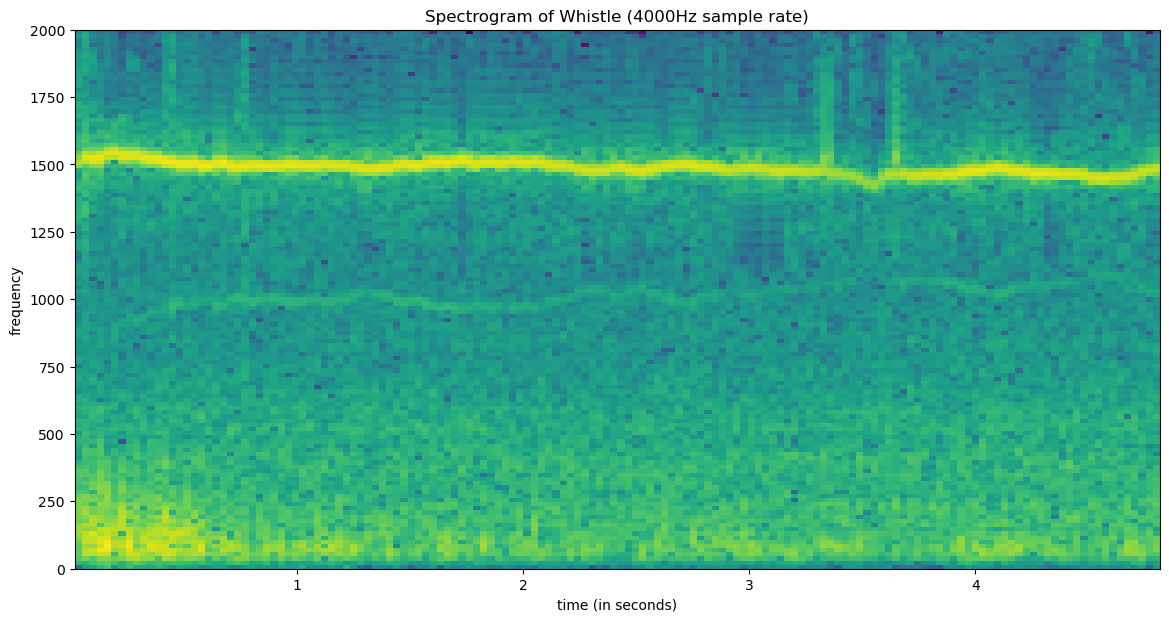

In [58]:
whistle_4000hz = [whistle[i] for i in range(0, len(whistle), 44100//4000)]
setup_graph(title='Spectrogram of Whistle (4000Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(whistle_4000hz, Fs=4000)

In [60]:
(pulse_sample_rate, pulse) = scipy.io.wavfile.read("audio_files/DSP - Pulse.wav")

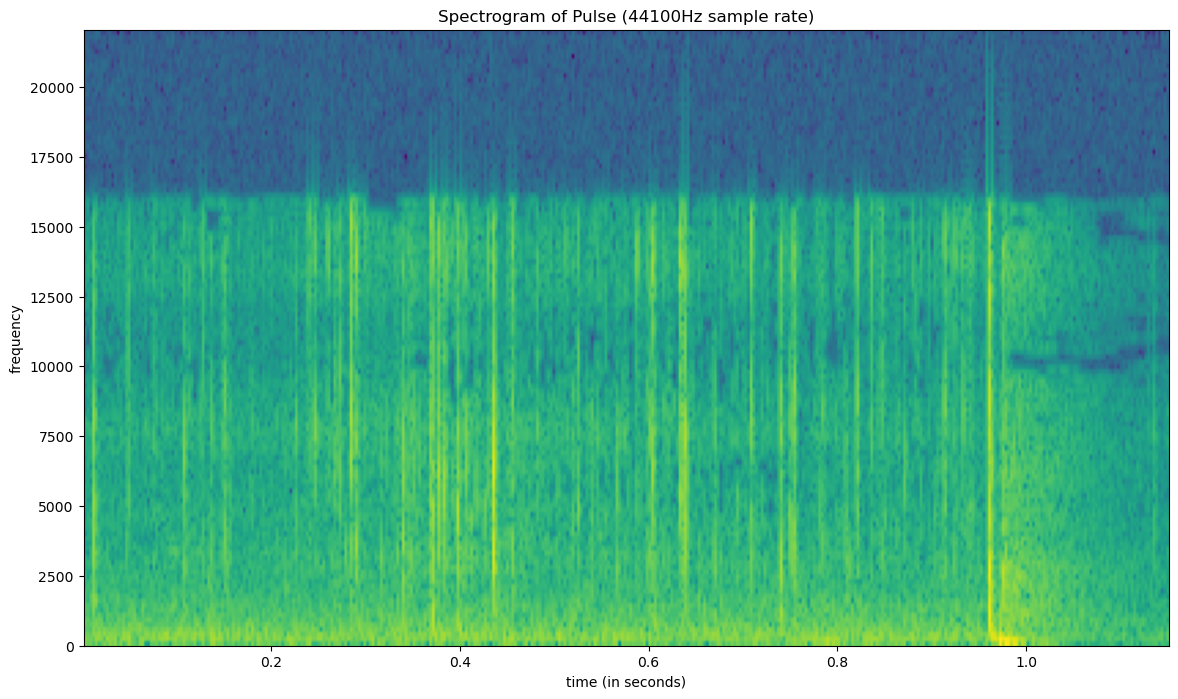

In [47]:
setup_graph(title='Spectrogram of Pulse (44100Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,8))
_ = plt.specgram(pulse, Fs=pulse_sample_rate)

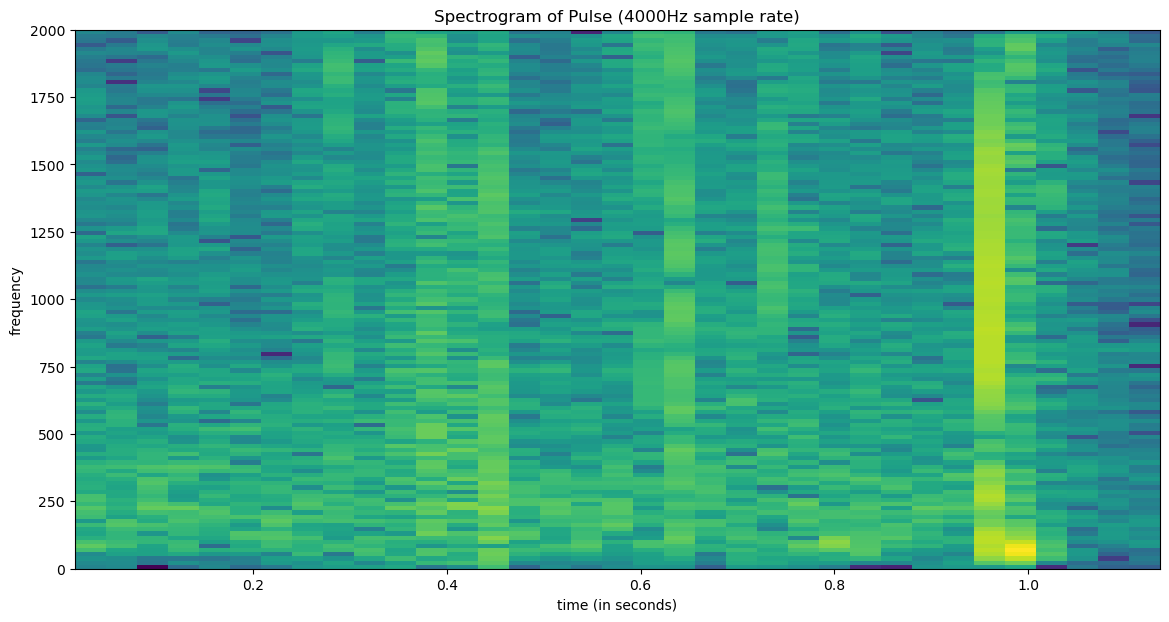

In [61]:
pulse_4000hz = [pulse[i] for i in range(0, len(pulse), 44100//4000)]
setup_graph(title='Spectrogram of Pulse (4000Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(pulse_4000hz, Fs=4000)

In [62]:
(dialring_sample_rate, dialring) = scipy.io.wavfile.read("audio_files/DSP - Dial Ring.wav")

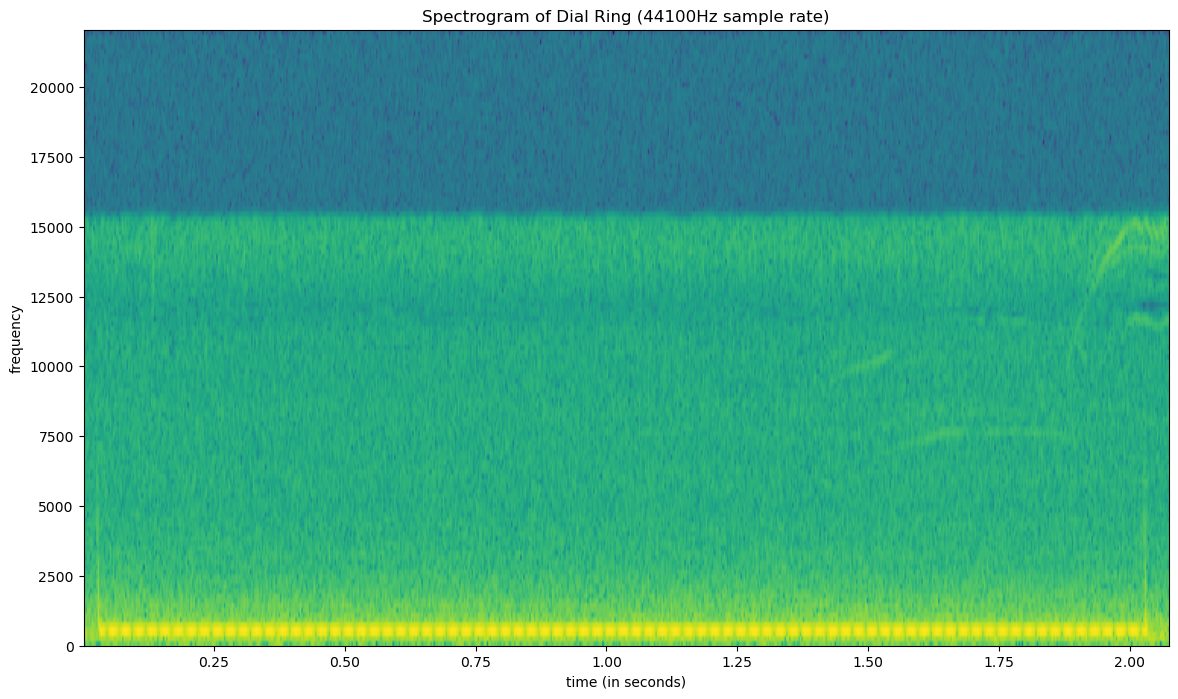

In [48]:
setup_graph(title='Spectrogram of Dial Ring (44100Hz sakmple rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,8))
_ = plt.specgram(dialring, Fs=dialring_sample_rate)

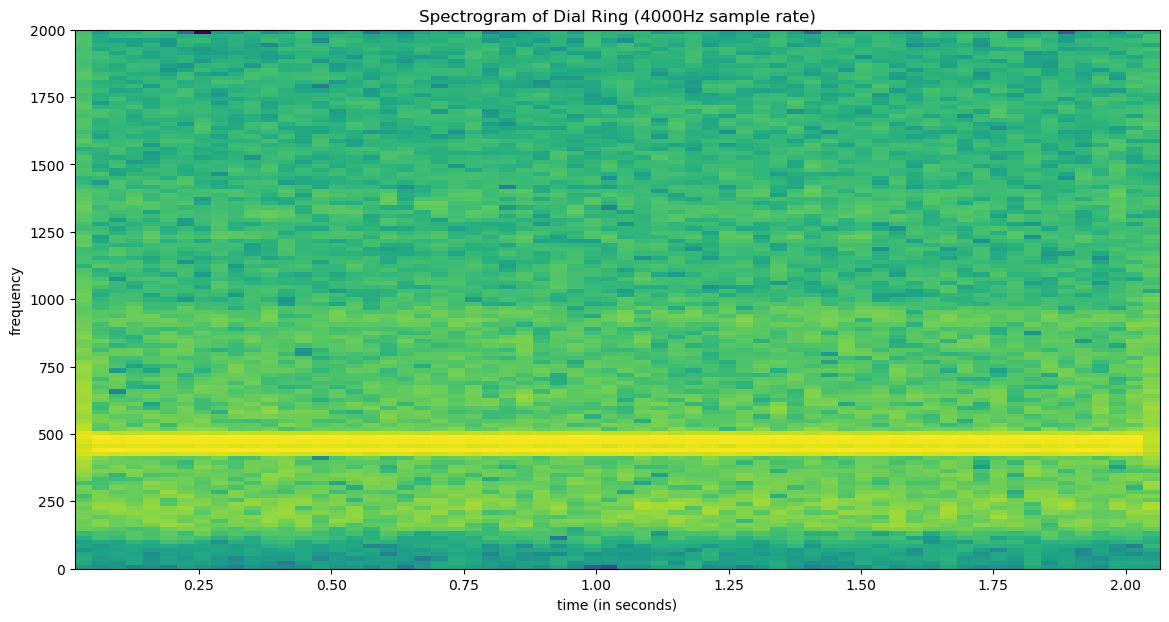

In [63]:
dialring_4000hz = [dialring[i] for i in range(0, len(dialring), 44100//4000)]
setup_graph(title='Spectrogram of Dial Ring (4000Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(dialring_4000hz, Fs=4000)

# iPhone Dialpad Signals

(600.0, 1300.0)

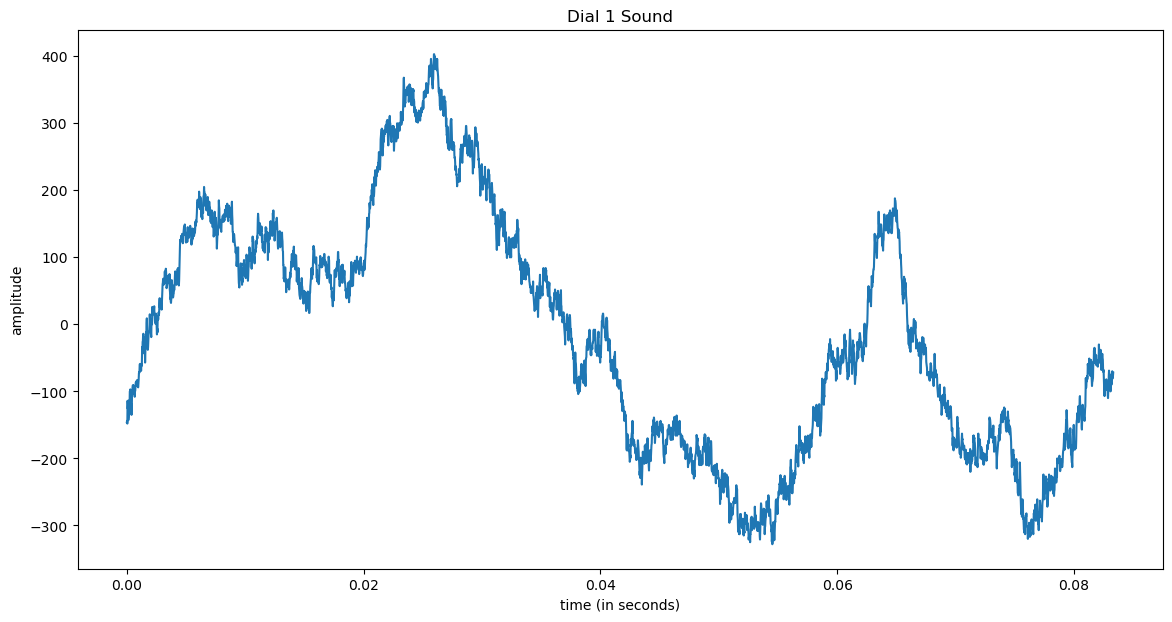

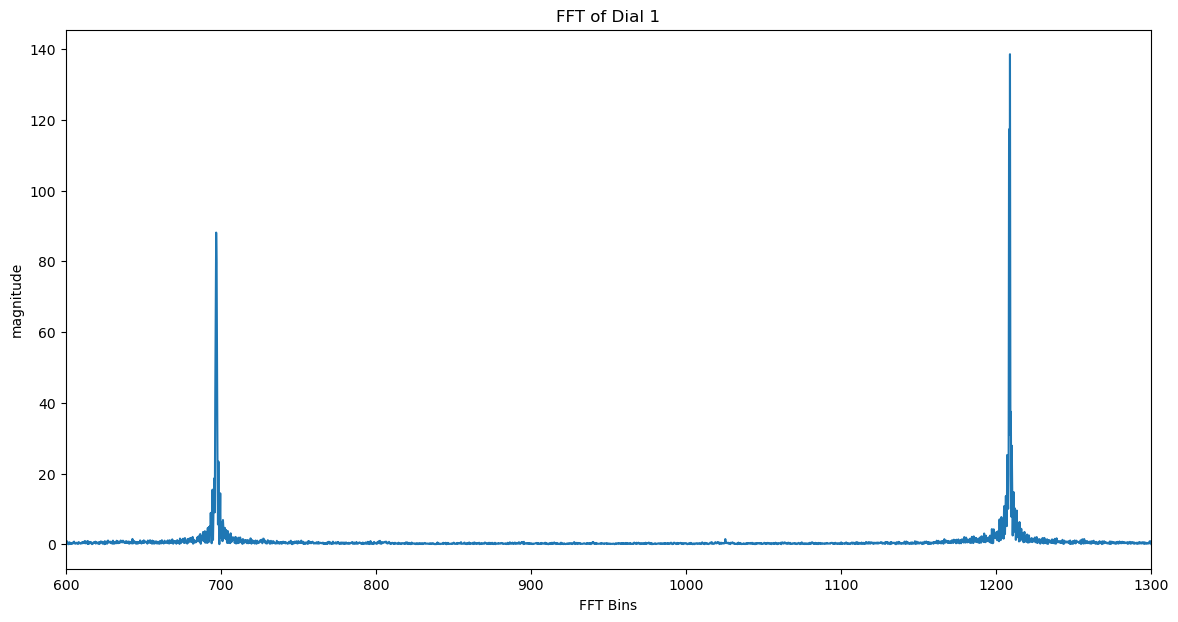

In [203]:
(sample_rate, input_signal) = scipy.io.wavfile.read("audio_files/Dial1.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)
setup_graph(title='Dial 1 Sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

fft_out = np.fft.rfft(input_signal)
fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
num_samples = len(input_signal)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

setup_graph(title='FFT of Dial 1', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:5000], fft_mag[0:5000])
plt.xlim(600, 1300)

(600.0, 1500.0)

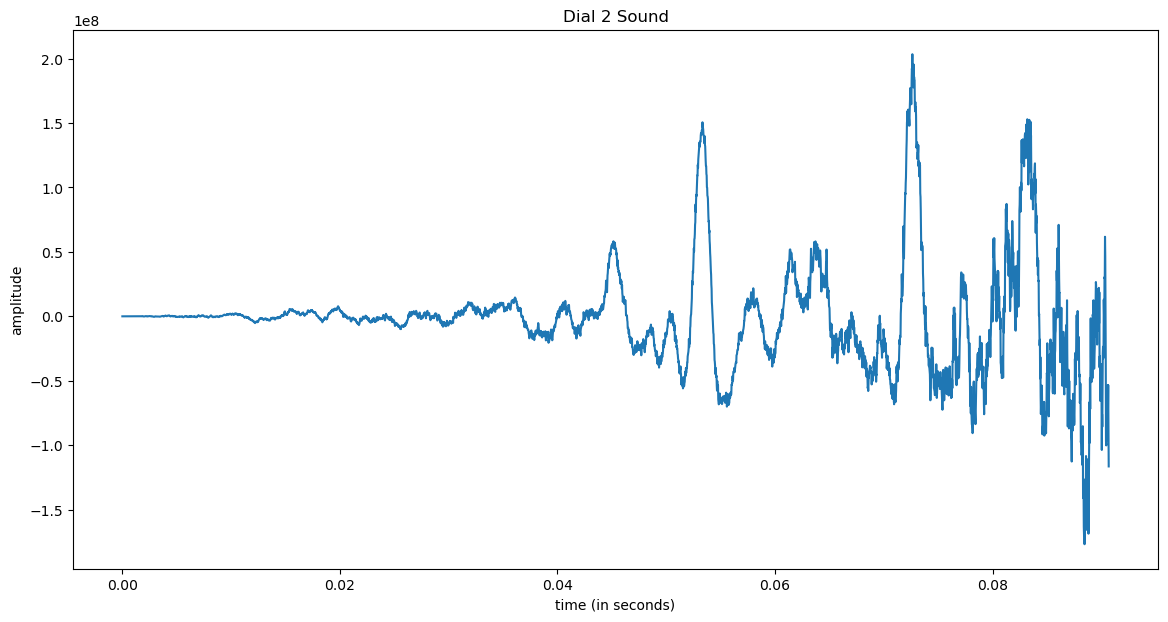

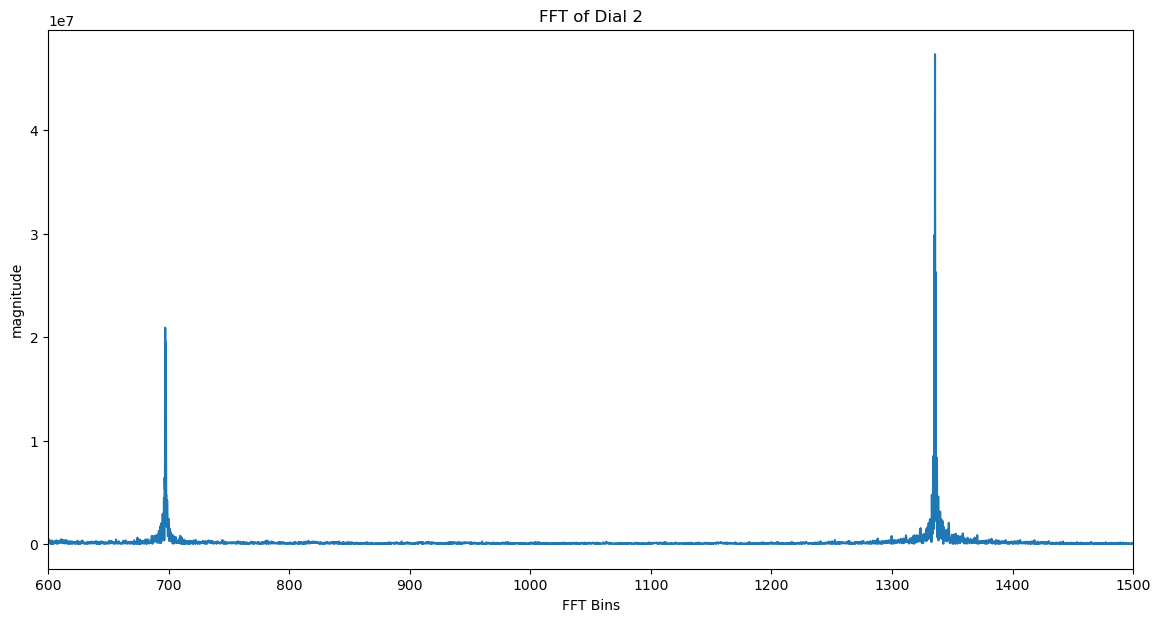

In [202]:
(sample_rate, input_signal) = scipy.io.wavfile.read("audio_files/Dial2.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)
setup_graph(title='Dial 2 Sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

fft_out = np.fft.rfft(input_signal)
fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
num_samples = len(input_signal)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

setup_graph(title='FFT of Dial 2', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:7000], fft_mag[0:7000])
plt.xlim(600, 1500)

(650.0, 1550.0)

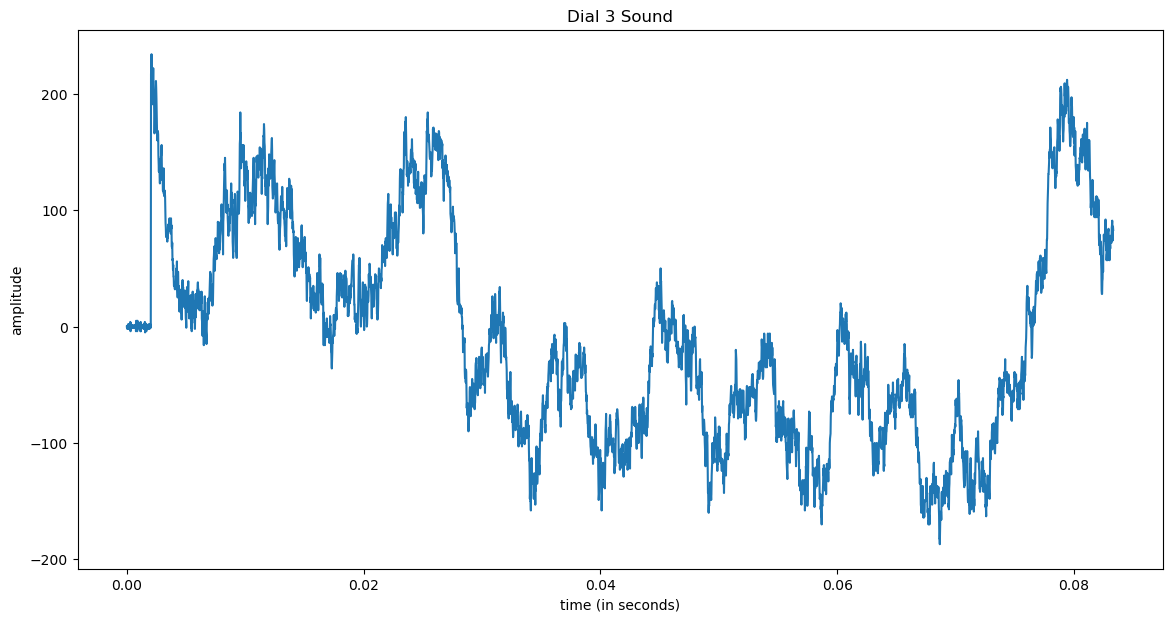

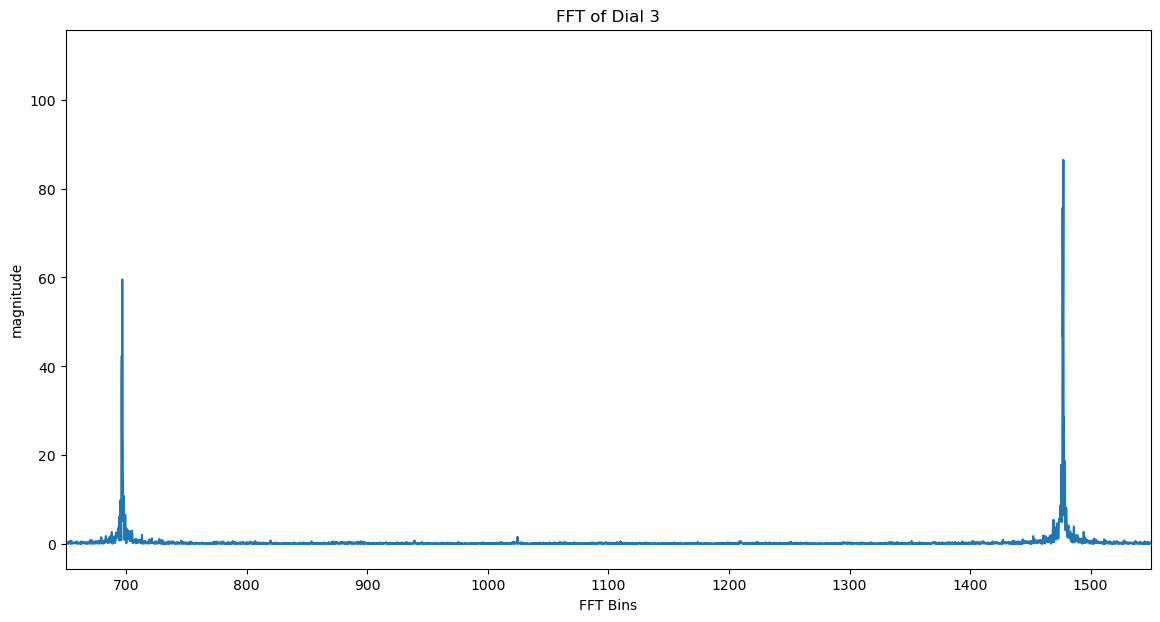

In [200]:
(sample_rate, input_signal) = scipy.io.wavfile.read("audio_files/Dial3.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)
setup_graph(title='Dial 3 Sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

fft_out = np.fft.rfft(input_signal)
fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
num_samples = len(input_signal)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

setup_graph(title='FFT of Dial 3', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:10000], fft_mag[0:10000])
plt.xlim(650, 1550)

(700.0, 1300.0)

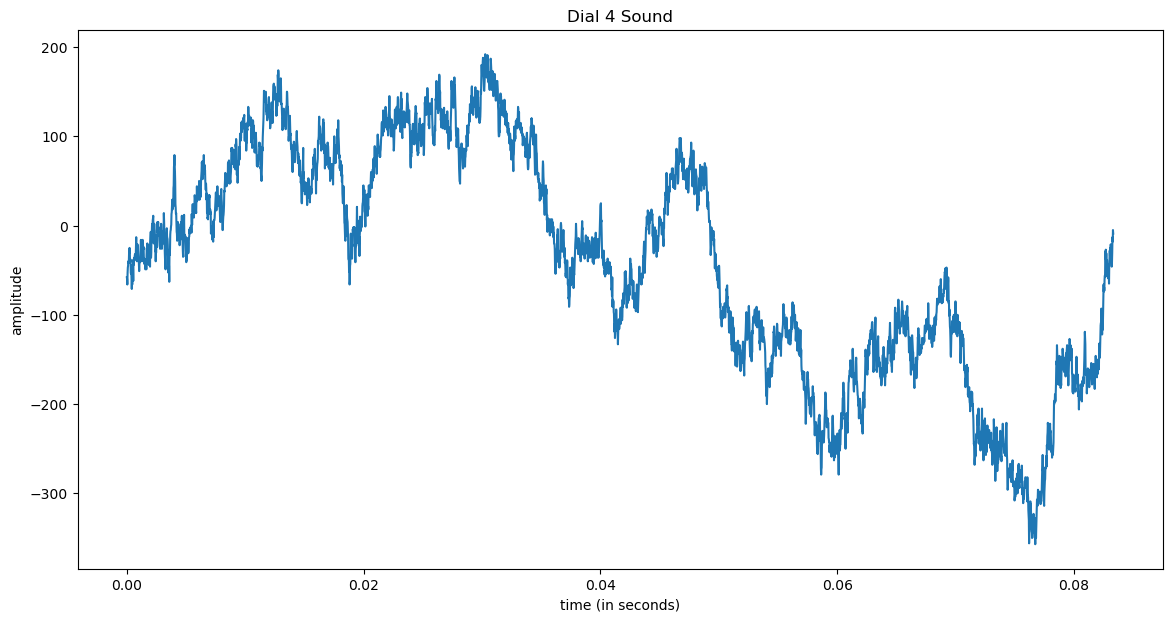

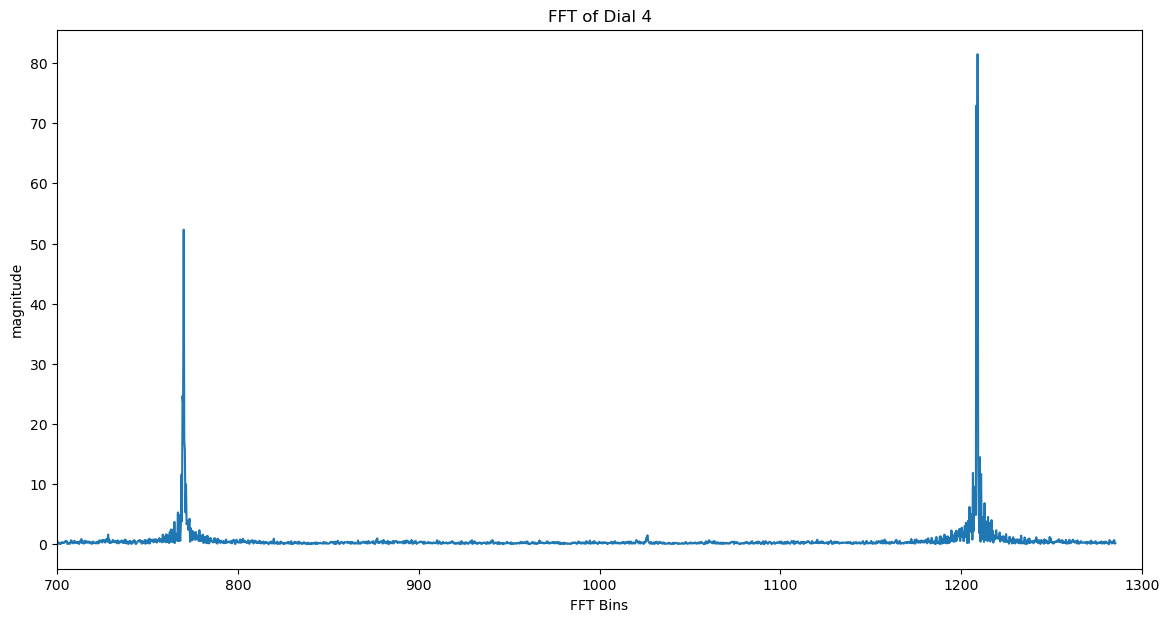

In [212]:
(sample_rate, input_signal) = scipy.io.wavfile.read("audio_files/Dial4.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)
setup_graph(title='Dial 4 Sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

fft_out = np.fft.rfft(input_signal)
fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
num_samples = len(input_signal)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

setup_graph(title='FFT of Dial 4', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:4000], fft_mag[0:4000])
plt.xlim(700, 1300)

(700.0, 1400.0)

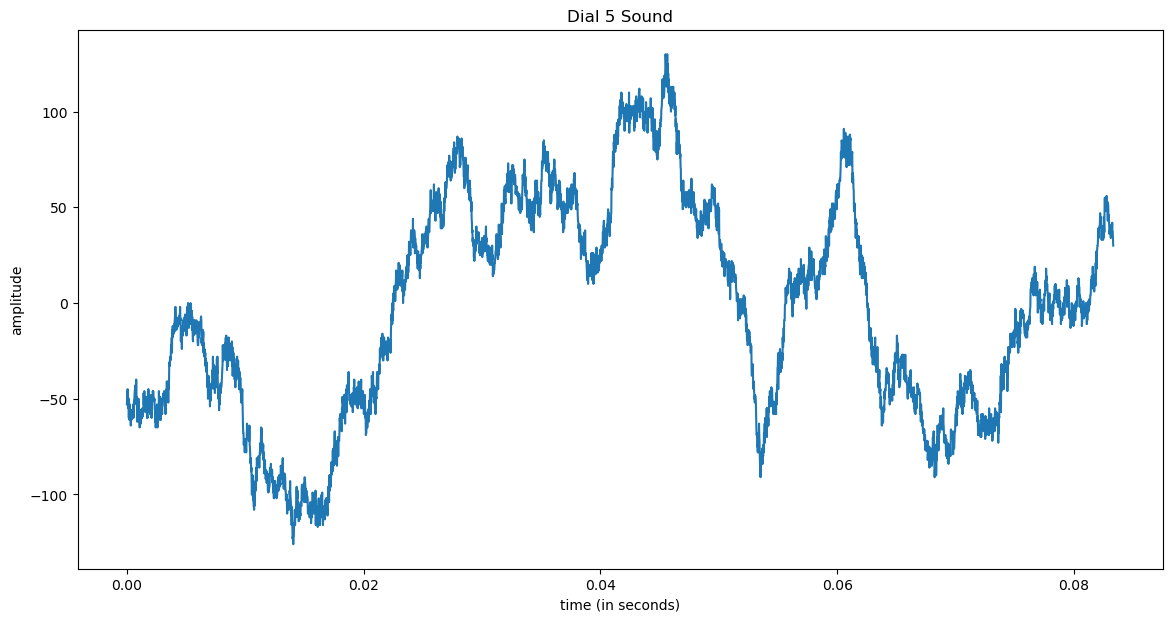

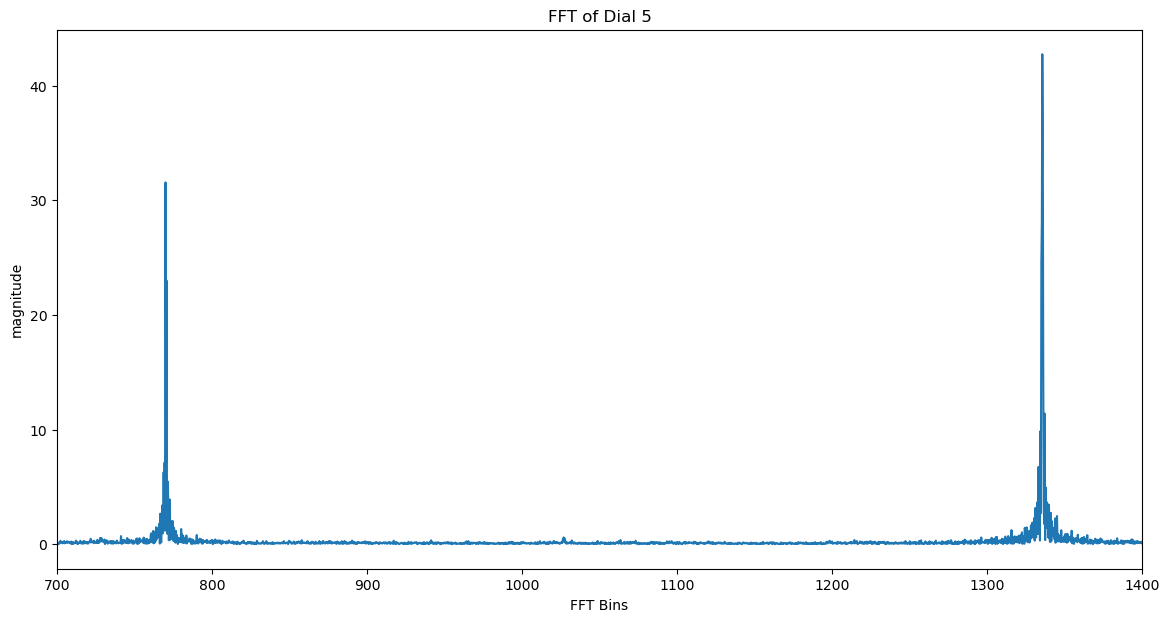

In [218]:
(sample_rate, input_signal) = scipy.io.wavfile.read("audio_files/Dial5.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)
setup_graph(title='Dial 5 Sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

fft_out = np.fft.rfft(input_signal)
fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
num_samples = len(input_signal)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

setup_graph(title='FFT of Dial 5', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:5000], fft_mag[0:5000])
plt.xlim(700, 1400)

(700.0, 1600.0)

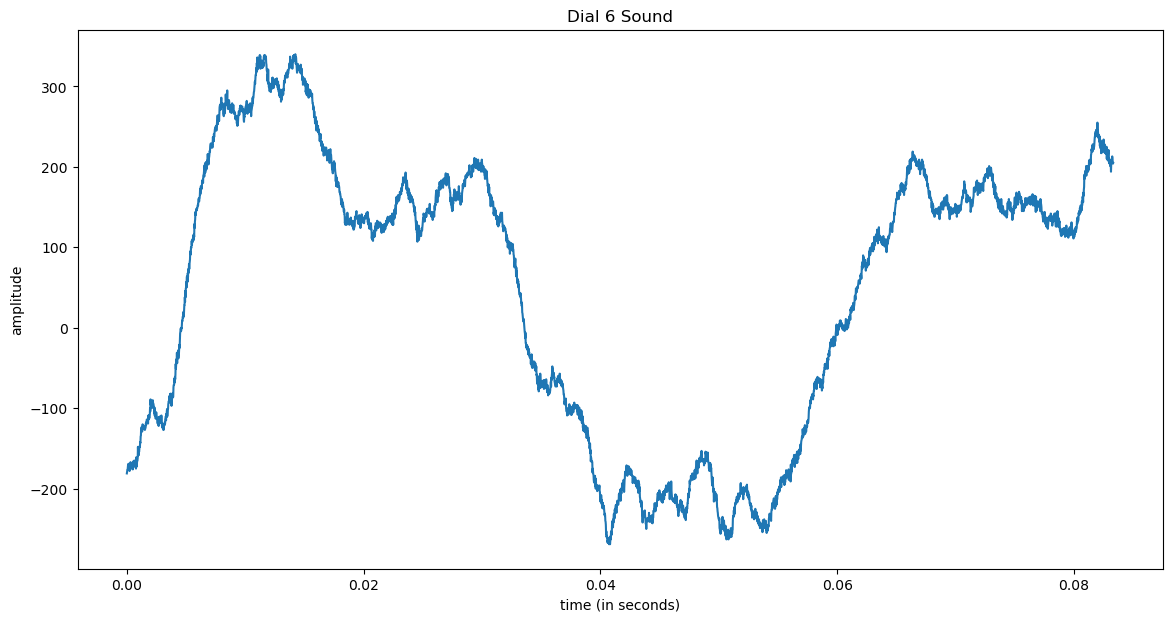

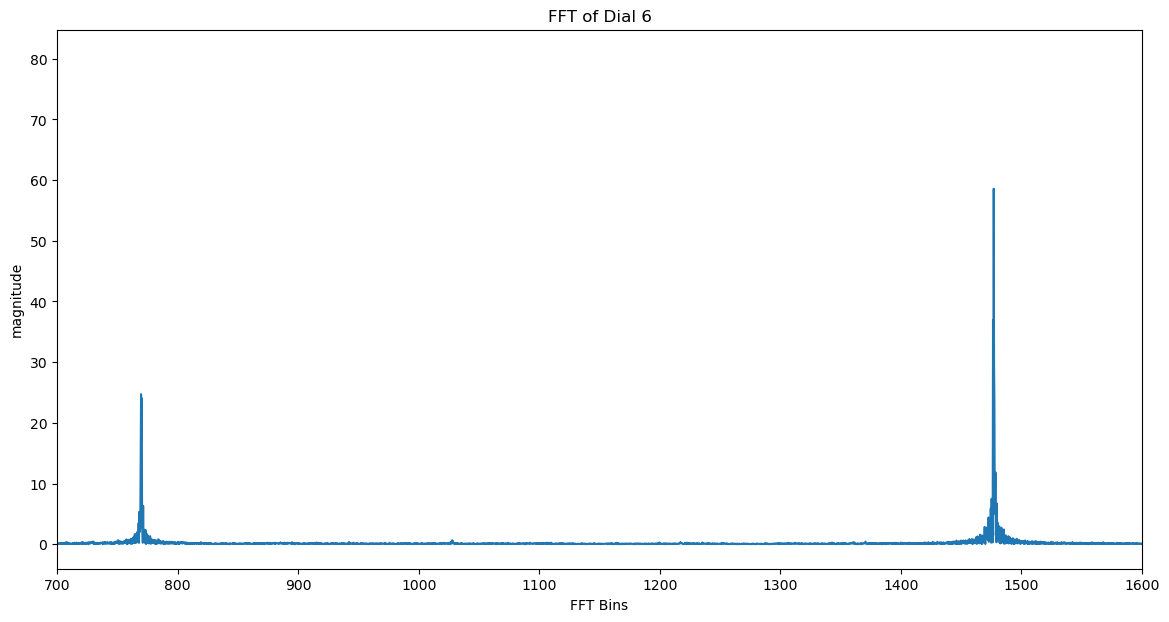

In [222]:
(sample_rate, input_signal) = scipy.io.wavfile.read("audio_files/Dial6.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)
setup_graph(title='Dial 6 Sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

fft_out = np.fft.rfft(input_signal)
fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
num_samples = len(input_signal)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

setup_graph(title='FFT of Dial 6', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:6000], fft_mag[0:6000])
plt.xlim(700, 1600)

(800.0, 1300.0)

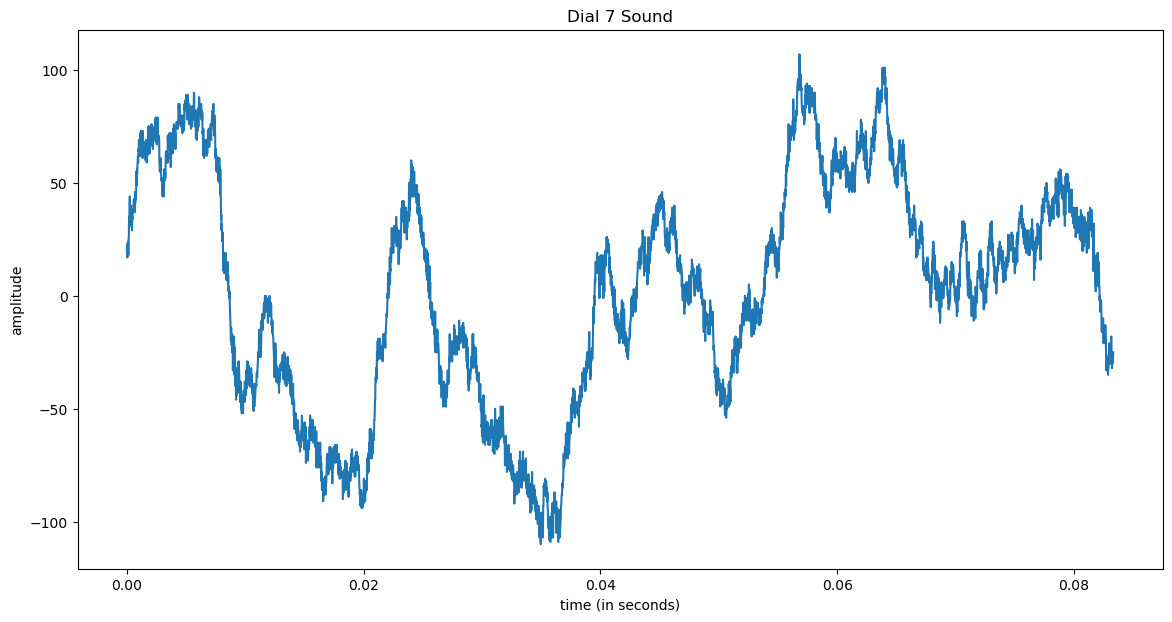

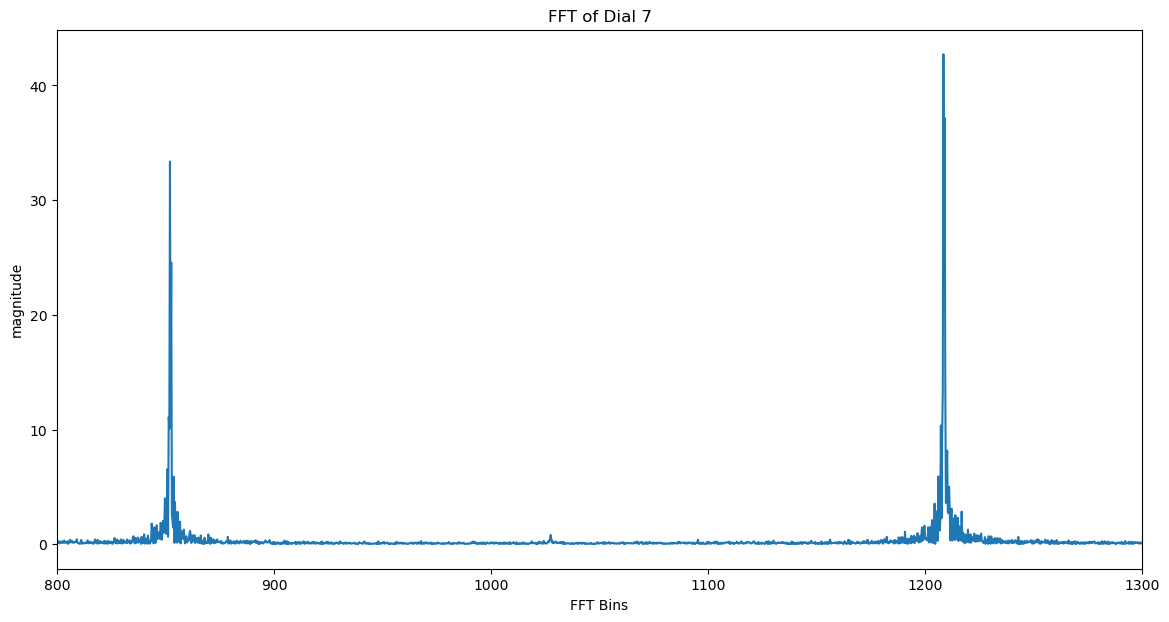

In [225]:
(sample_rate, input_signal) = scipy.io.wavfile.read("audio_files/Dial7.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)
setup_graph(title='Dial 7 Sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

fft_out = np.fft.rfft(input_signal)
fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
num_samples = len(input_signal)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

setup_graph(title='FFT of Dial 7', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:6000], fft_mag[0:6000])
plt.xlim(800, 1300)

(800.0, 1400.0)

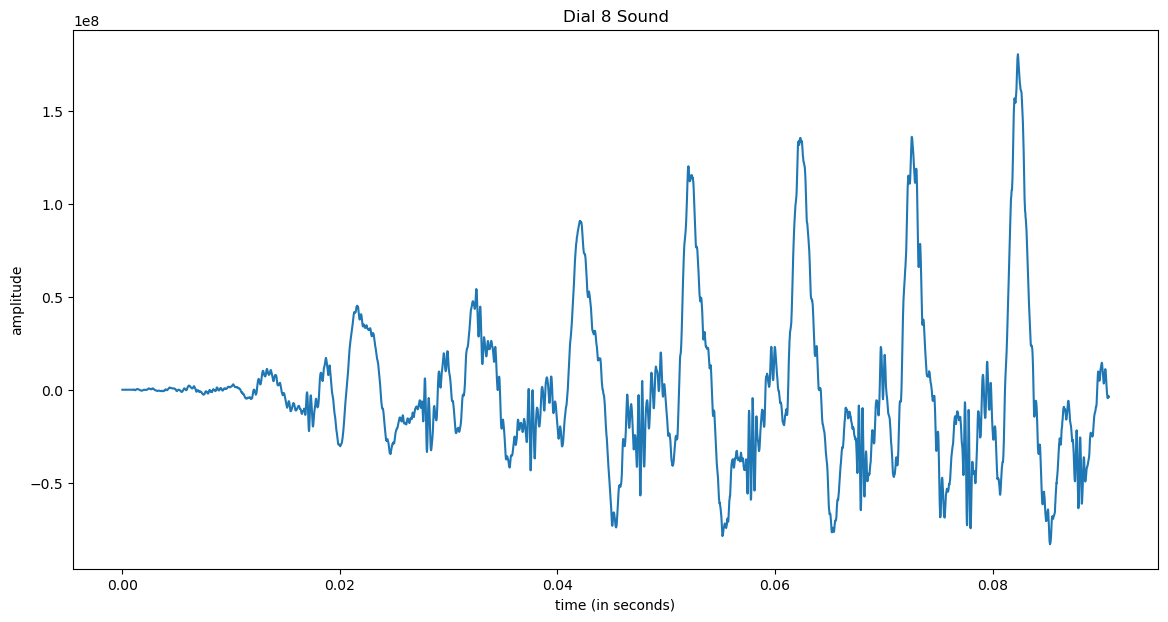

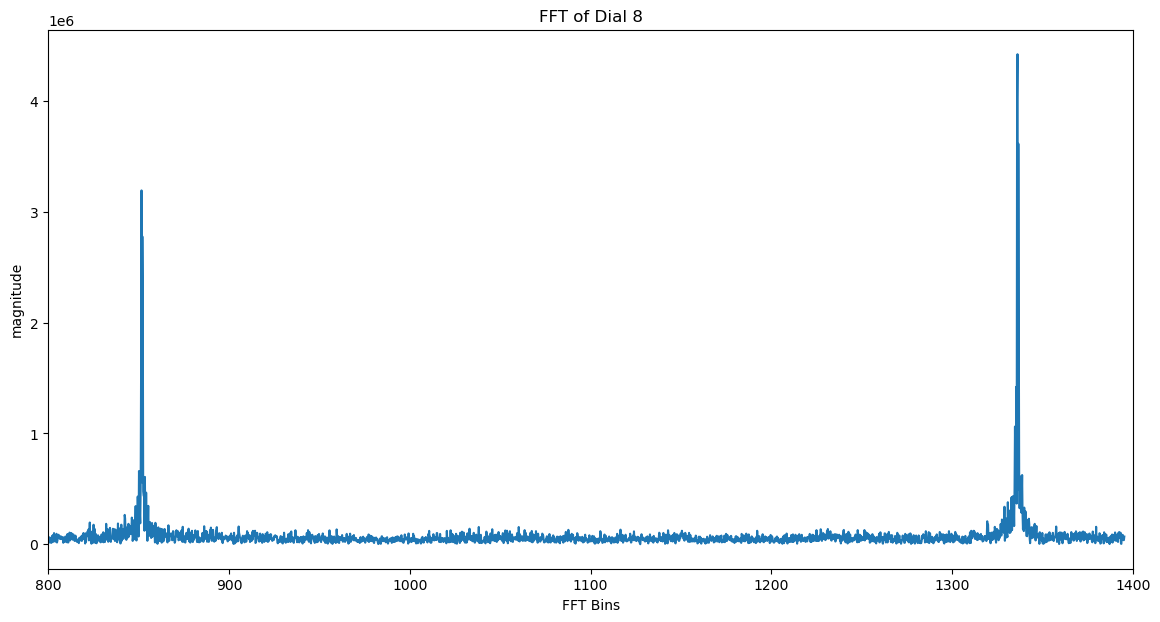

In [226]:
(sample_rate, input_signal) = scipy.io.wavfile.read("audio_files/Dial8.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)
setup_graph(title='Dial 8 Sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

fft_out = np.fft.rfft(input_signal)
fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
num_samples = len(input_signal)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

setup_graph(title='FFT of Dial 8', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:6000], fft_mag[0:6000])
plt.xlim(800, 1400)

(800.0, 1550.0)

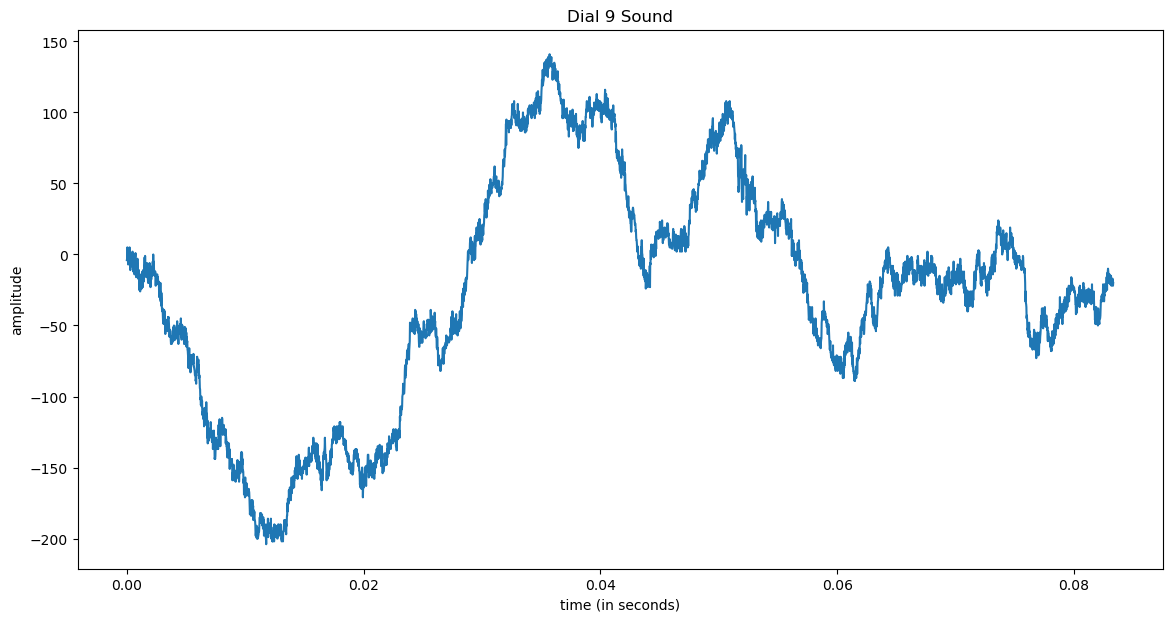

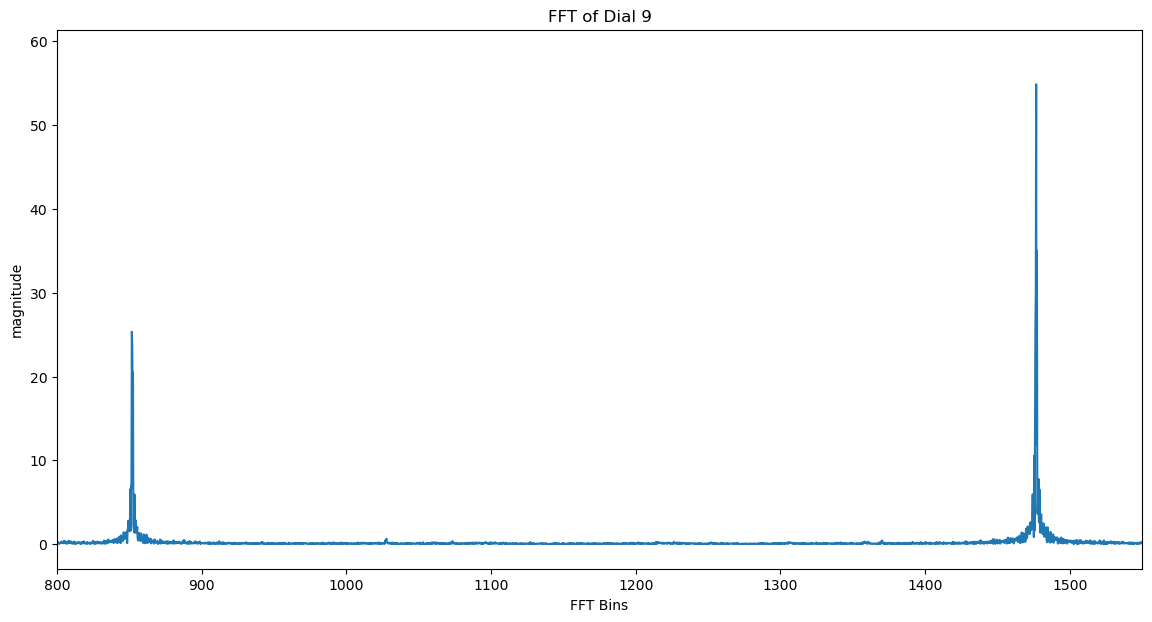

In [234]:
(sample_rate, input_signal) = scipy.io.wavfile.read("audio_files/Dial9.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)
setup_graph(title='Dial 9 Sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

fft_out = np.fft.rfft(input_signal)
fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
num_samples = len(input_signal)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

setup_graph(title='FFT of Dial 9', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:6000], fft_mag[0:6000])
plt.xlim(800, 1550)

## Dial * = A#5 and D#6 (detuned)

(900.0, 1250.0)

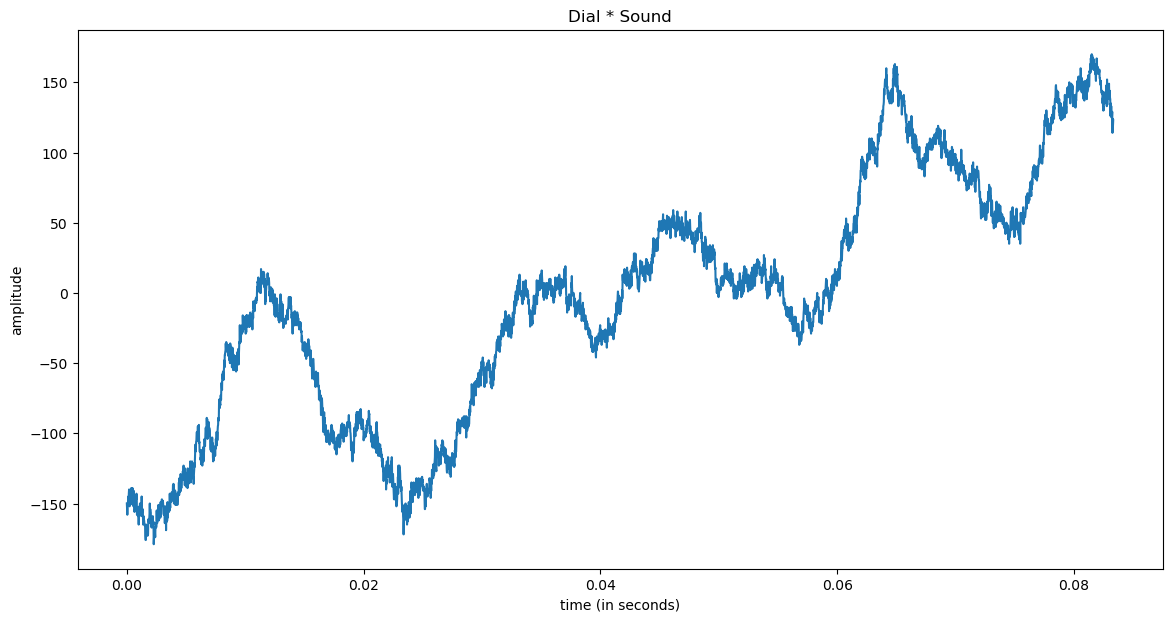

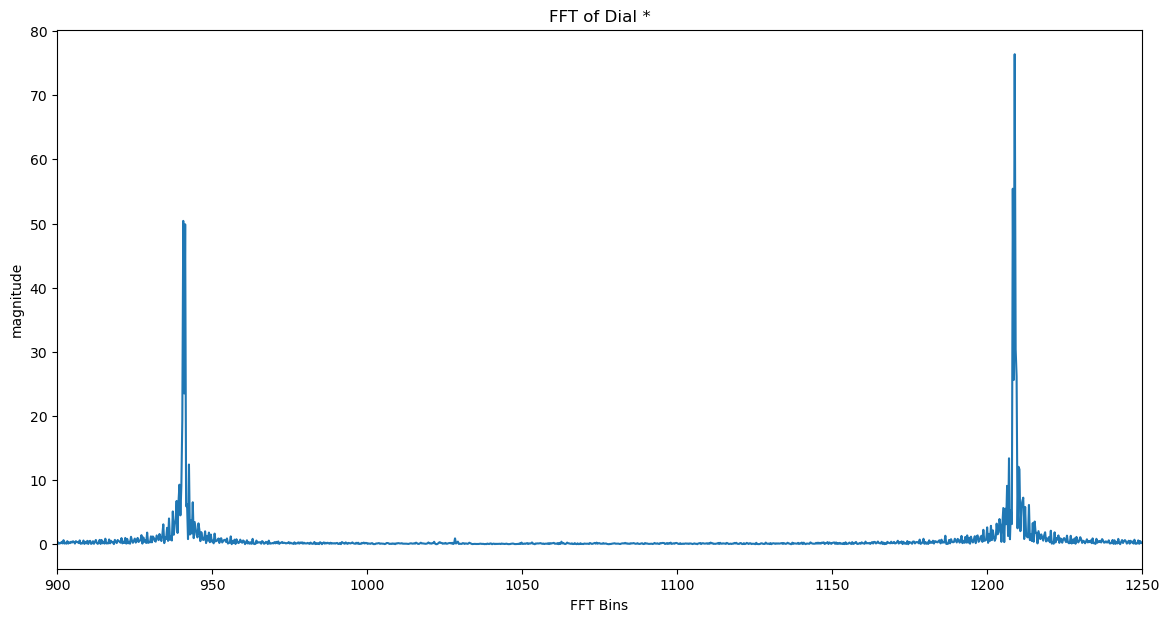

In [239]:
(sample_rate, input_signal) = scipy.io.wavfile.read("audio_files/DialStar.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)
setup_graph(title='Dial * Sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

fft_out = np.fft.rfft(input_signal)
fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
num_samples = len(input_signal)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

setup_graph(title='FFT of Dial *', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:4500], fft_mag[0:4500])
plt.xlim(900, 1250)

## Dial 0 = A#5 and E6 (detuned)

(900.0, 1400.0)

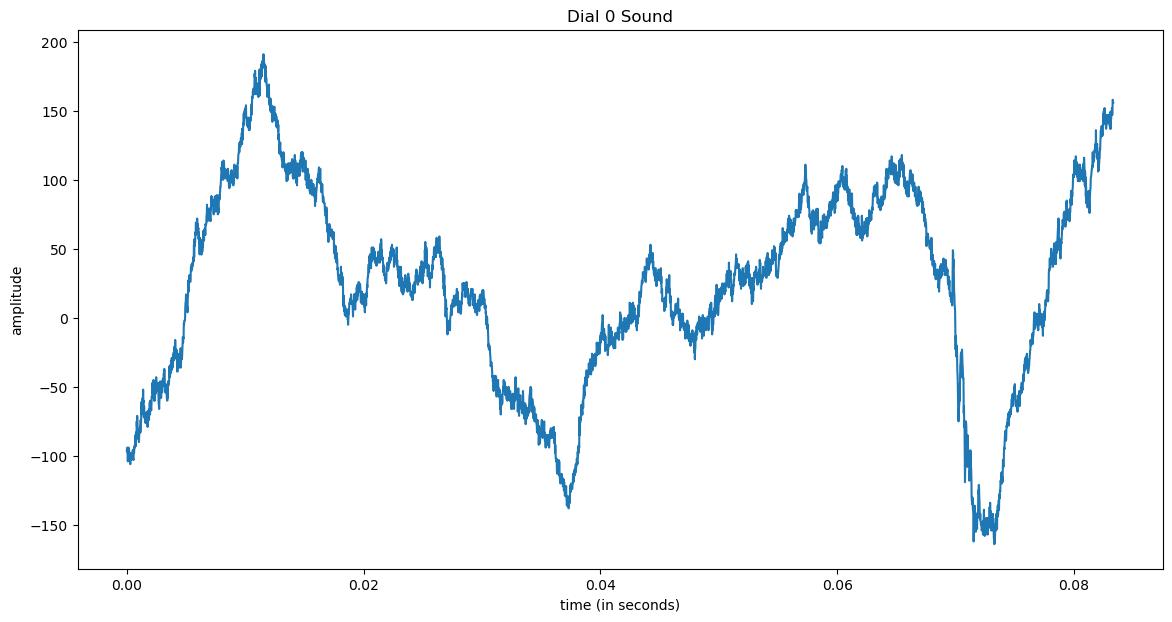

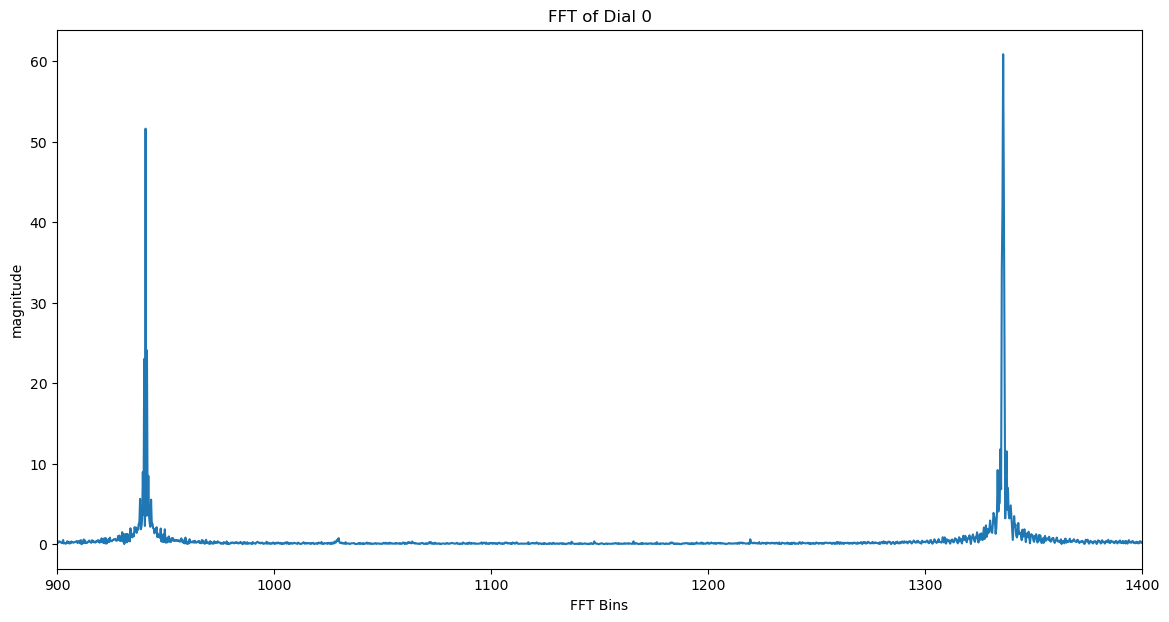

In [250]:
(sample_rate, input_signal) = scipy.io.wavfile.read("audio_files/Dial0.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)
setup_graph(title='Dial 0 Sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

fft_out = np.fft.rfft(input_signal)
fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
num_samples = len(input_signal)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

setup_graph(title='FFT of Dial 0', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:4500], fft_mag[0:4500])
plt.xlim(900, 1400)

## Dial # = A#5 and F#6

(900.0, 1500.0)

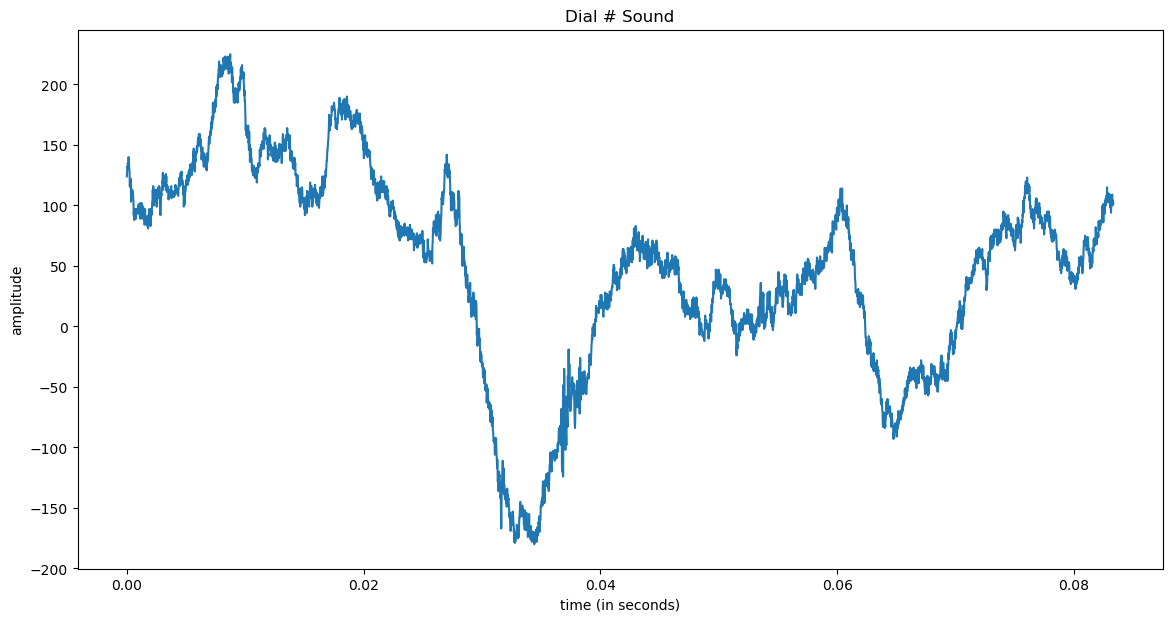

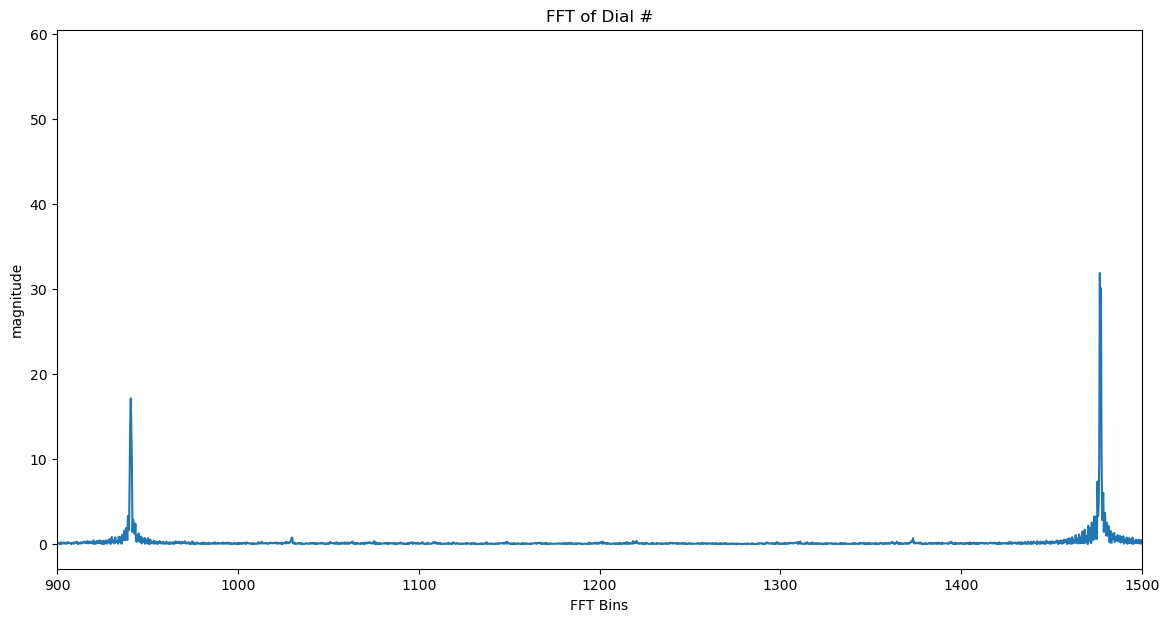

In [248]:
(sample_rate, input_signal) = scipy.io.wavfile.read("audio_files/DialPound.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)
setup_graph(title='Dial # Sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

fft_out = np.fft.rfft(input_signal)
fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
num_samples = len(input_signal)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

setup_graph(title='FFT of Dial #', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:6000], fft_mag[0:6000])
plt.xlim(900, 1500)

### Looking closely at the spectrograms, we find that each sound has harmonics. These harmonics are positive integer multiples of the original frequency. 
### We can see this clearer by comparing guitar notes with their harmonics played at the 5th frets. It is known that, with the original tuning EADGBE, each string played at the fifth fret except for G which is played at the 4th fret will produce a harmonic that is a frequency multiple of the next string (sounds the same as the next string but at a higher octave). This is due to the nature of guitar frets - one fret up is one half-step up. For example, to get from E to A, we will move 5 half-steps E-->F-->F#-->G-->G#-->A and, from G to B, 4 half-steps G-->G#-->A-->A#-->B.
### (Show Spectrogram of original note and harmonic at 5th fret)

# Audio Filtering

## First, we should discuss the Short-Time Fourier Transform (STFT) which can be used in audio filtering.
#### 1. We will take a signal and split it up into sections (which can overlap).
#### 2. Windows - Raised cosine with non-zero endpoints that we can apply to each section.
#### 2. Window functions - After applying the window to each section, the resulting function should have an amplitude which decreases gradually towards zero at the edges of the function curve. Need to determine a window f(x) which can create this.
#### 3. Apply the window function and apply FFT to each section.
#### 4. Place the sections back together into one graph to get our STFT signal.